In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas import DataFrame
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import pickle
import collections
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
import random

import seaborn as sns

import collections

pd.options.display.max_rows=500
pd.options.display.max_columns=999

plt.rcParams['figure.figsize'] = (15, 5)
import warnings; warnings.simplefilter('ignore')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Events
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\events\\READY\\Events_with_description", 'rb')
ev = pickle.load(f1)
f1.close()

# Main dataset
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Boarding_2017_w", 'rb')
df = pickle.load(f1)
f1.close()

bo=df

df=df[df['BoardingPassengerCount']>0]

df['isEvent']=df['event_1h_aft']+df['event_2h_aft']+df['event_3h_aft']+df['event_1h_bef']+df['event_2h_bef']+df['event_3h_bef']+df['event_during']           

df['Time_difference'] = [round(x) for x in df['Time_difference']]

df['event_during_1h_aft']=(df['Time_difference']==-1)*1
df['event_during_2h_aft']=(df['Time_difference']==-2)*1
df['event_during_3h_aft']=(df['Time_difference']==-3)*1
df['event_during_4h_aft']=(df['Time_difference']==-4)*1
df['event_during_5h_aft']=(df['Time_difference']==-5)*1


dfs=[]
i=0
for name in df.PoiName.unique():
    print(i,"= ",name)
    i=i+1
    df_new=df[df['PoiName']==name]
    dfs.append(df_new)

0 =  Vega
1 =  Forum
2 =  Parken
3 =  Bella Center
4 =  Royal Arena
5 =  DR Koncerthuset


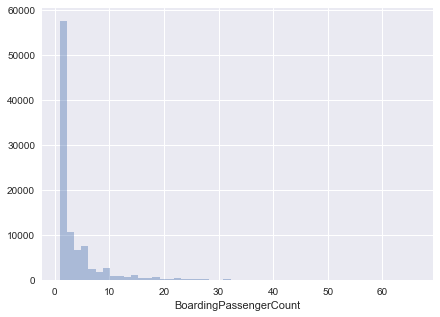

In [3]:
# plt.hist(df.BoardingPassengerCount,bins=50);
plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(df.BoardingPassengerCount,kde=False)

In [4]:
df.BoardingPassengerCount.mean()

3.5875851945056096

# Analysis on when the event have an imparct

In [5]:
dfs=[]
i=0
for name in df.PoiName.unique():
    print(i,"= ",name)
    i=i+1
    df_new=df[df['PoiName']==name]
    dfs.append(df_new)

0 =  Vega
1 =  Forum
2 =  Parken
3 =  Bella Center
4 =  Royal Arena
5 =  DR Koncerthuset


In [6]:
cols=['event_during_2h_aft','event_during_3h_aft','event_during_4h_aft','event_during_5h_aft', 'event_1h_aft', 'event_2h_aft',  'event_3h_aft' 
     ]

In [7]:
dfs[0][dfs[0]['event_2h_aft']==1]

BoardingPassengerCount  BoardingPassengerCount_lag1  \
4981                        1                          1.0   
5845                        3                          7.0   
5847                        2                          5.0   
7564                        2                          8.0   
8090                       19                          4.0   
8091                        1                          3.0   
9087                        1                          4.0   
9091                        2                          1.0   
9886                        2                          4.0   
10218                       2                         20.0   
11803                       9                          3.0   
11805                       3                          9.0   
12723                       3                          2.0   
12726                       4                          1.0   
12728                       2                          3.0   
12897                       1                          1.0   
12898                       2                          9.0   
16645                       1                          2.0   
16647                       5                          5.0   
19856                       2                          1.0   
29495                       2                          4.0   
32110                       1                          2.0   
32606                       7                         17.0   
34364                       2                          7.0   
36429                       9                          6.0   
38409                       7                          8.0   
38411                      22                          7.0   
38600                       1                          1.0   
38601                      12                         11.0   
38895                       6                         12.0   
38897                       1                          1.0   
39931                       1                          4.0   
39932                       6                          2.0   
42671                       6                          3.0   
43016                       3                          6.0   
43515                      12                          4.0   
46048                       1                         17.0   
46227                       3                          6.0   
49490                       5                         24.0   
49827                       2                          2.0   
49829                      23                         22.0   
50313                       9                          5.0   
50464                       3                         10.0   
50629                       3                          2.0   
50815                       5                          9.0   
51295                       6                         25.0   
51296                       1                          1.0   
51298                       1                          2.0   
51611                       7                          9.0   
53554                       3                          1.0   
54293                       1                          3.0   
54765                       3                          2.0   

       BoardingPassengerCount_lag2  BoardingPassengerCount_lag3  \
4981                           2.0                          3.0   
5845                           5.0                          1.0   
5847                           2.0                          2.0   
7564                           5.0                          7.0   
8090                           1.0                          1.0   
8091                           4.0                          2.0   
9087                           6.0                          5.0   
9091                           1.0                          1.0   
9886                          21.0                          4.0   
10218                          3.0                

-----------------------------------------------------------------
['Vega']
hour= 22
feature event_during_2h_aft
1547


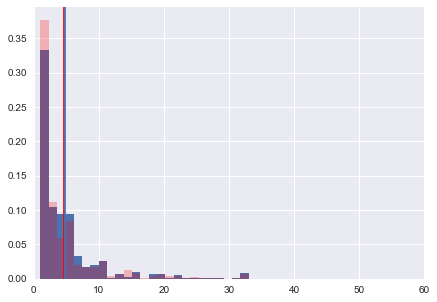

hour= 23
feature event_during_3h_aft
1547


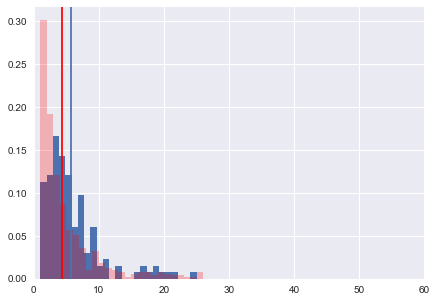

hour= 23
feature event_during_4h_aft
1547


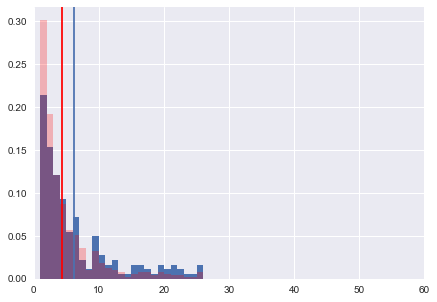

hour= 23
feature event_during_5h_aft
1547


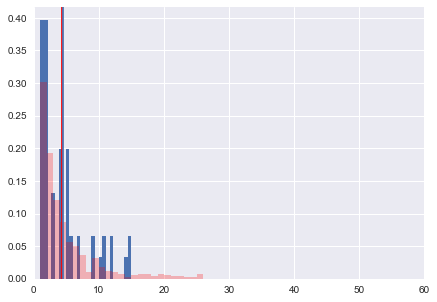

hour= 23
feature event_1h_aft
1547


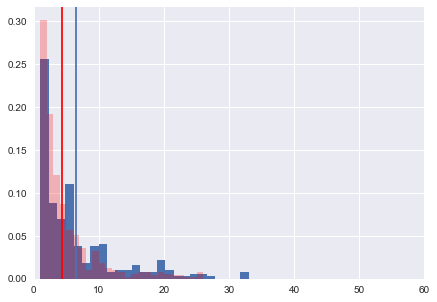

hour= 23
feature event_2h_aft
1547


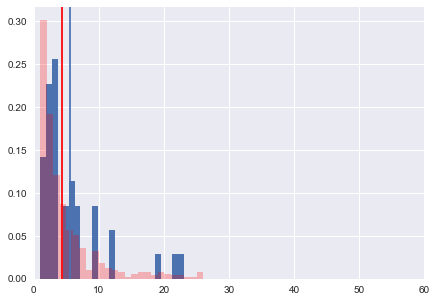

hour= 19
feature event_3h_aft
1547


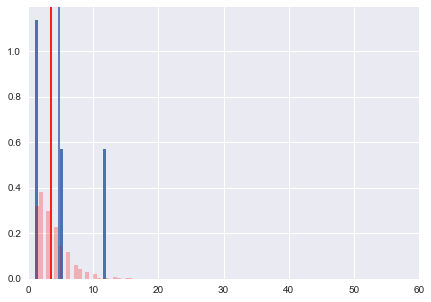

hour= 21
feature event_during_2h_aft
1586


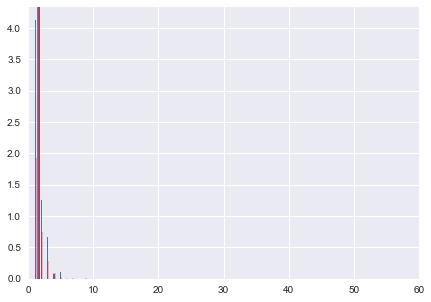

hour= 23
feature event_during_3h_aft
1586


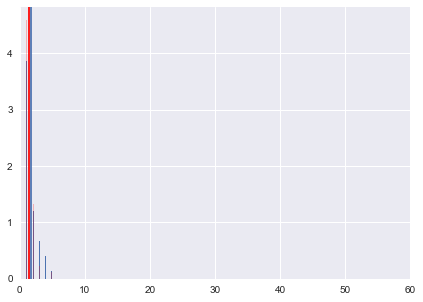

hour= 23
feature event_during_4h_aft
1586


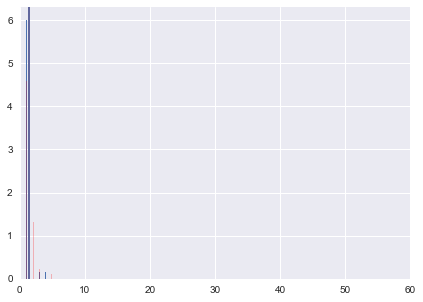

hour= 22
feature event_during_5h_aft
1586


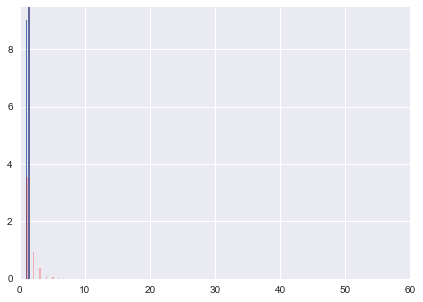

hour= 23
feature event_1h_aft
1586


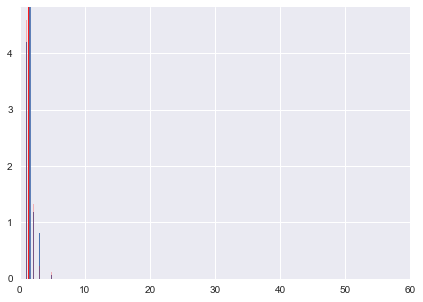

hour= 23
feature event_2h_aft
1586


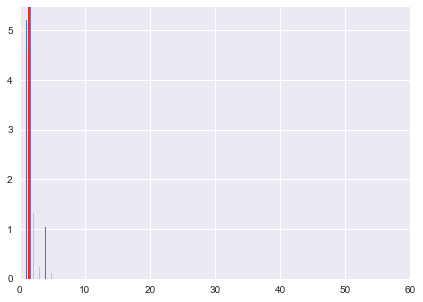

1586
hour= 21
feature event_during_2h_aft
7081


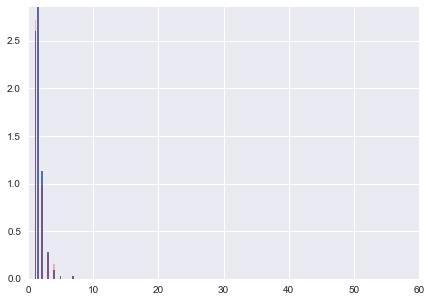

hour= 23
feature event_during_3h_aft
7081


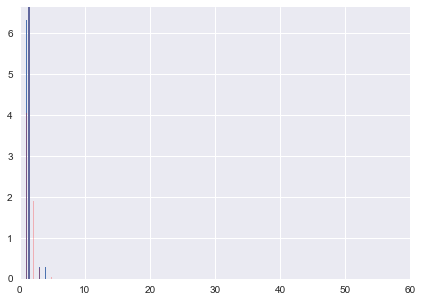

hour= 23
feature event_during_4h_aft
7081


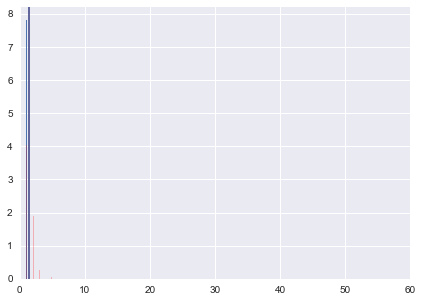

hour= 23
feature event_during_5h_aft
7081


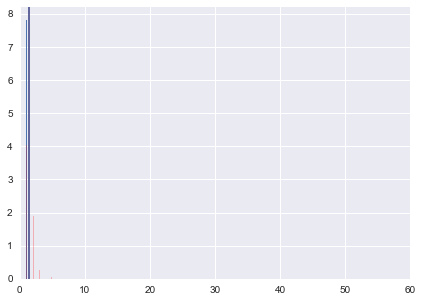

hour= 23
feature event_1h_aft
7081


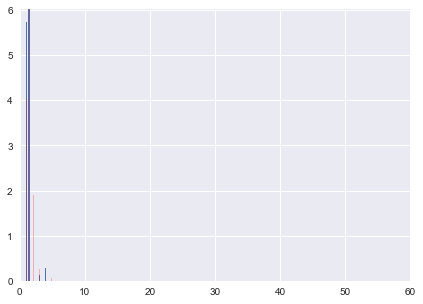

hour= 23
feature event_2h_aft
7081


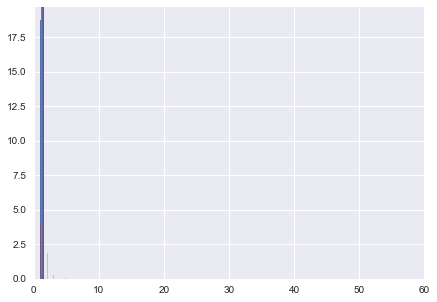

7081
-----------------------------------------------------------------
['Forum']
hour= 11
feature event_during_2h_aft
678


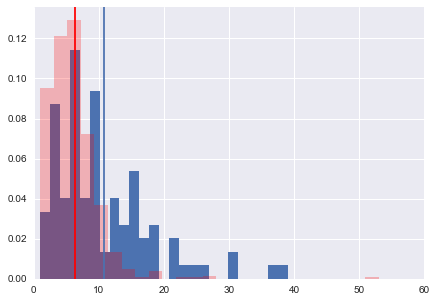

hour= 12
feature event_during_3h_aft
678


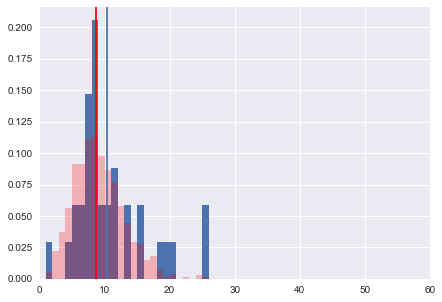

hour= 12
feature event_during_4h_aft
678


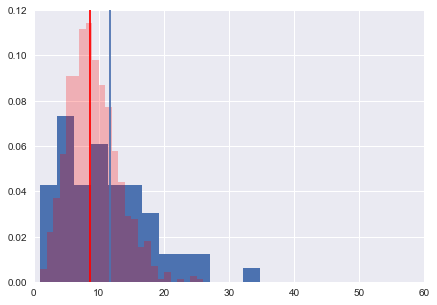

hour= 13
feature event_during_5h_aft
678


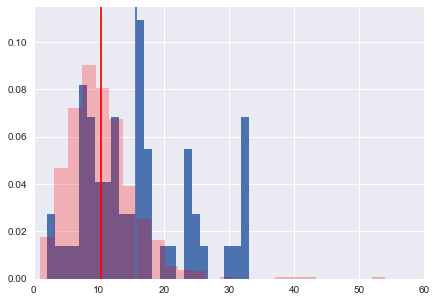

hour= 17
feature event_1h_aft
678


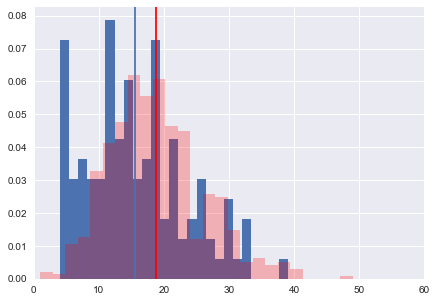

hour= 19
feature event_2h_aft
678


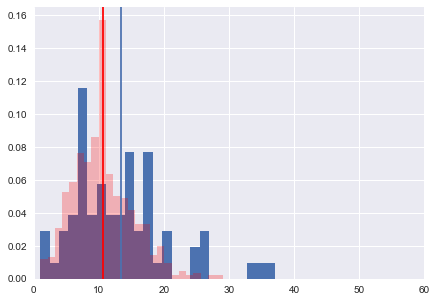

hour= 20
feature event_3h_aft
678


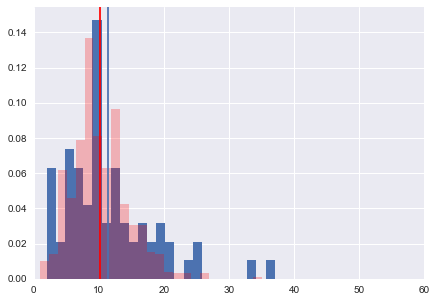

hour= 11
feature event_during_2h_aft
715


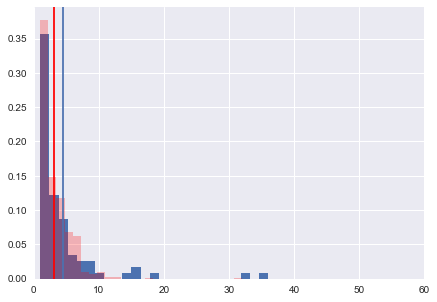

hour= 12
feature event_during_3h_aft
715


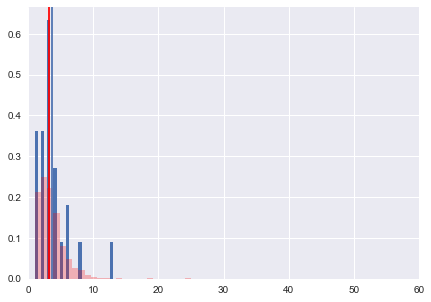

hour= 12
feature event_during_4h_aft
715


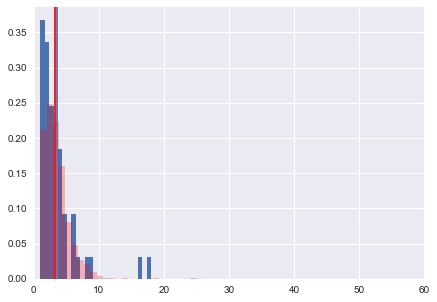

hour= 14
feature event_during_5h_aft
715


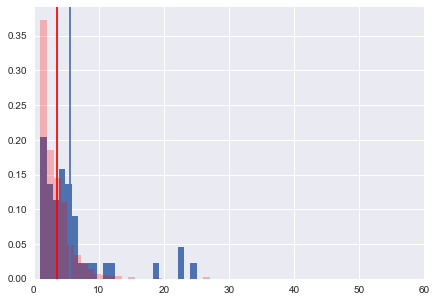

hour= 17
feature event_1h_aft
715


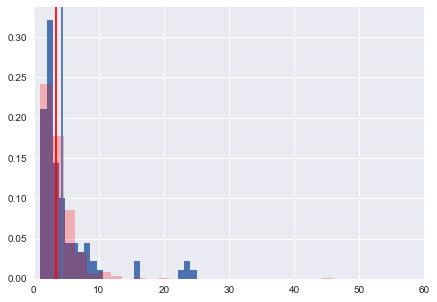

hour= 18
feature event_2h_aft
715


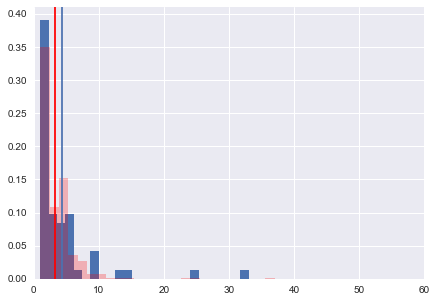

hour= 19
feature event_3h_aft
715


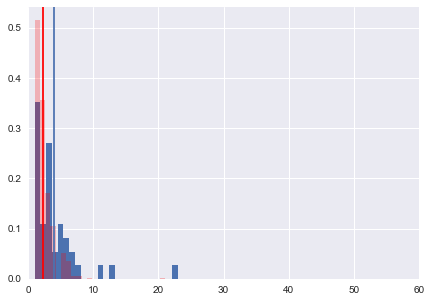

hour= 9
feature event_during_2h_aft
50822


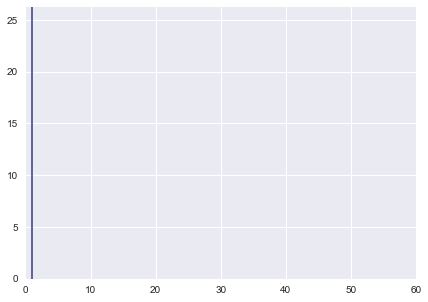

hour= 14
feature event_during_3h_aft
50822


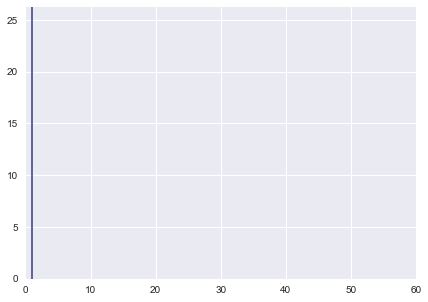

hour= 15
feature event_during_4h_aft
50822


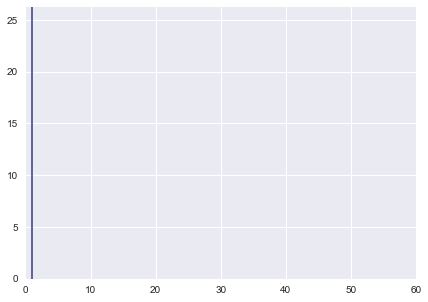

50822
hour= 9
feature event_1h_aft
50822


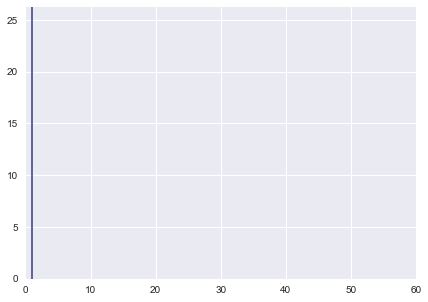

hour= 14
feature event_2h_aft
50822


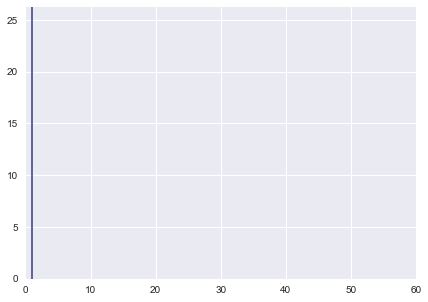

hour= 15
feature event_3h_aft
50822


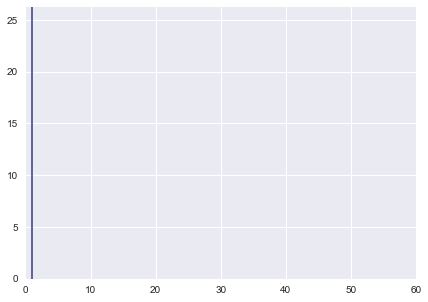

-----------------------------------------------------------------
['Parken']
hour= 20
feature event_during_2h_aft
1410


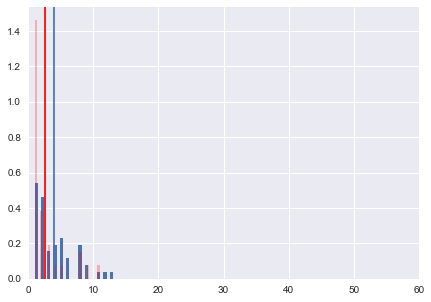

hour= 21
feature event_during_3h_aft
1410


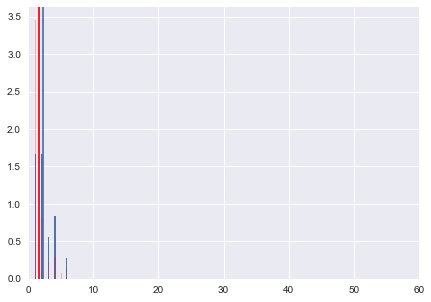

hour= 22
feature event_during_4h_aft
1410


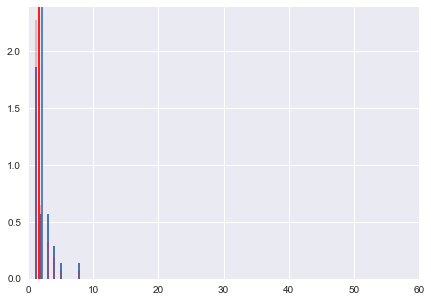

hour= 22
feature event_during_5h_aft
1410


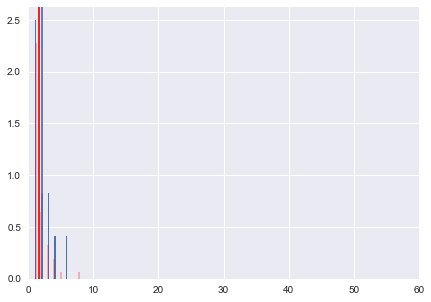

hour= 19
feature event_1h_aft
1410


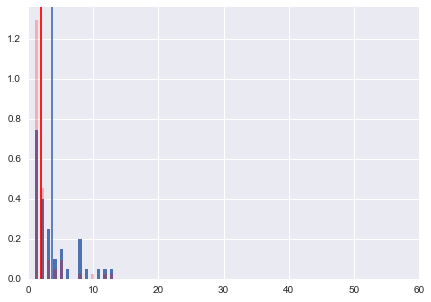

hour= 20
feature event_2h_aft
1410


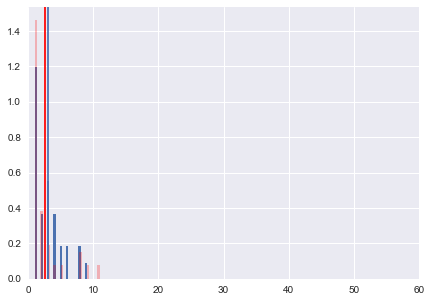

hour= 22
feature event_3h_aft
1410


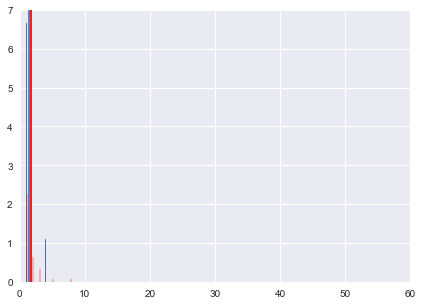

hour= 20
feature event_during_2h_aft
1409


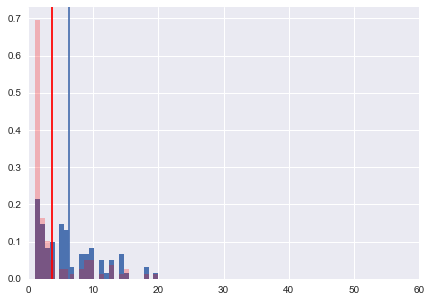

hour= 21
feature event_during_3h_aft
1409


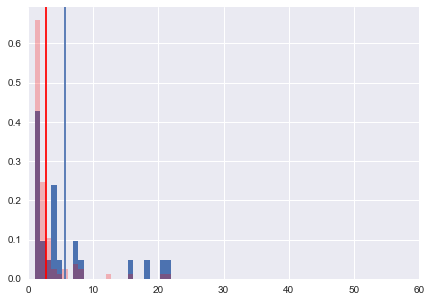

hour= 21
feature event_during_4h_aft
1409


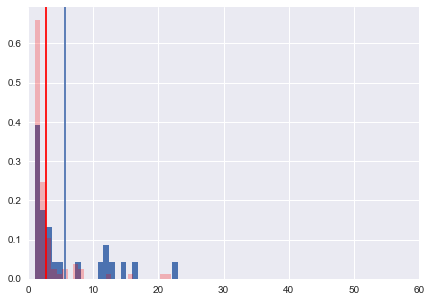

hour= 17
feature event_during_5h_aft
1409


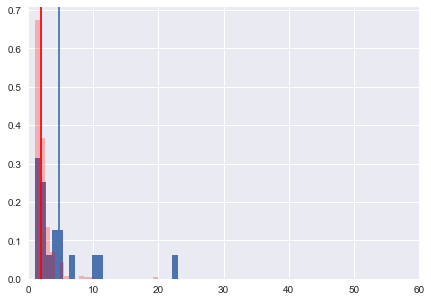

hour= 19
feature event_1h_aft
1409


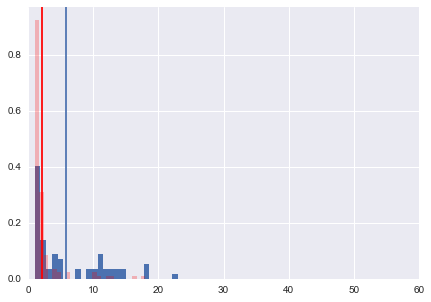

hour= 21
feature event_2h_aft
1409


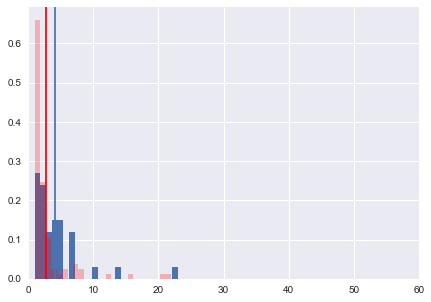

hour= 15
feature event_3h_aft
1409


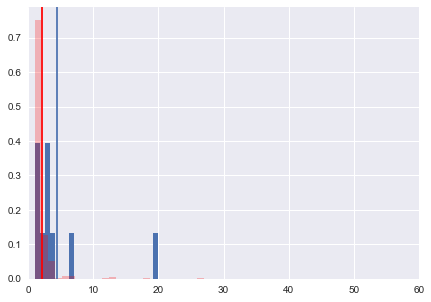

hour= 19
feature event_during_2h_aft
1365


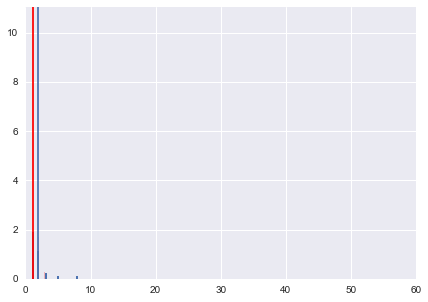

hour= 21
feature event_during_3h_aft
1365


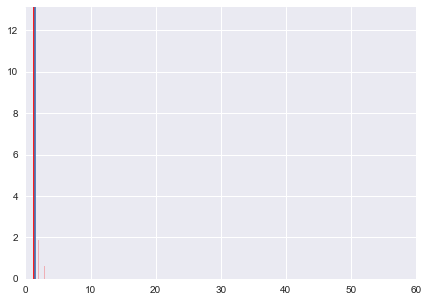

hour= 15
feature event_during_4h_aft
1365


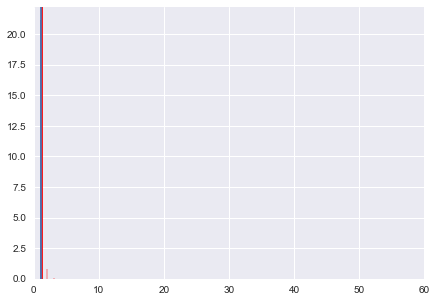

hour= 22
feature event_during_5h_aft
1365


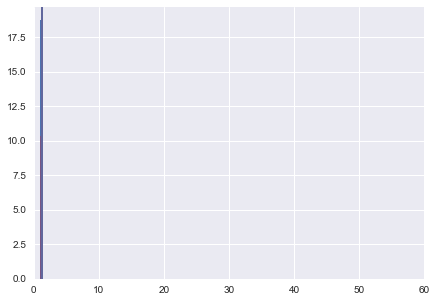

hour= 20
feature event_1h_aft
1365


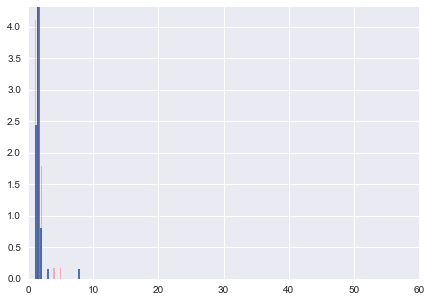

hour= 17
feature event_2h_aft
1365


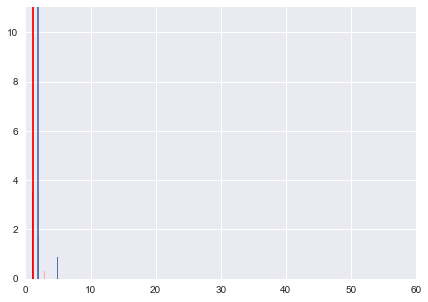

hour= 22
feature event_3h_aft
1365


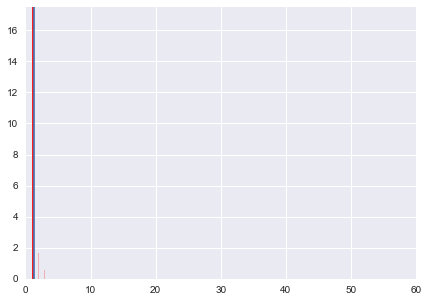

-----------------------------------------------------------------
['Bella Center']
hour= 12
feature event_during_2h_aft
28000


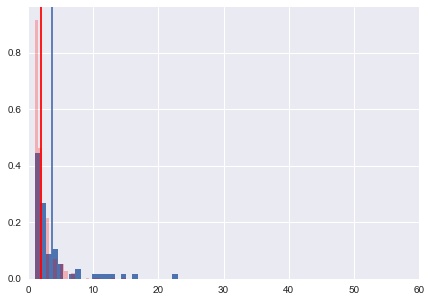

hour= 13
feature event_during_3h_aft
28000


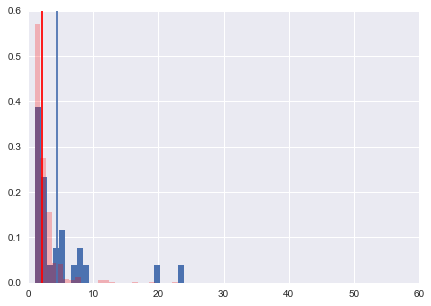

hour= 14
feature event_during_4h_aft
28000


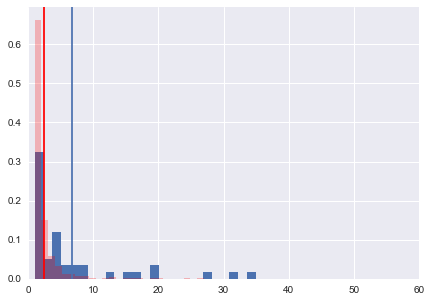

hour= 15
feature event_during_5h_aft
28000


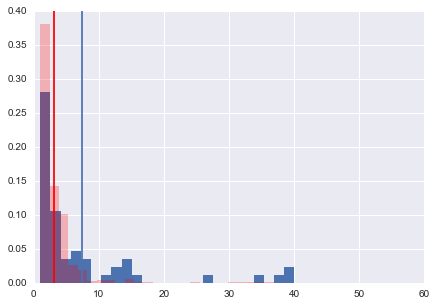

hour= 18
feature event_1h_aft
28000


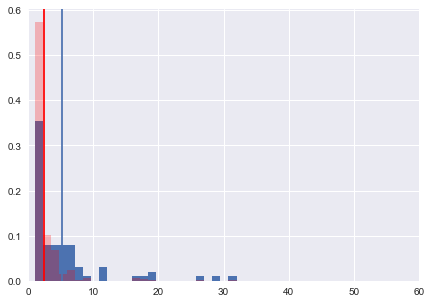

hour= 15
feature event_2h_aft
28000


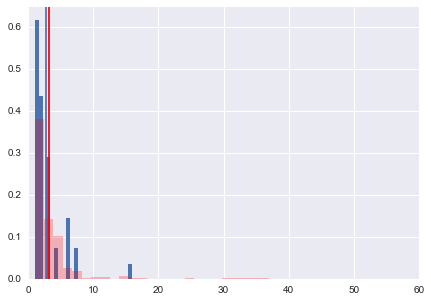

hour= 16
feature event_3h_aft
28000


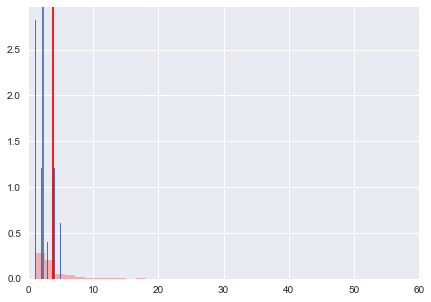

hour= 12
feature event_during_2h_aft
28005


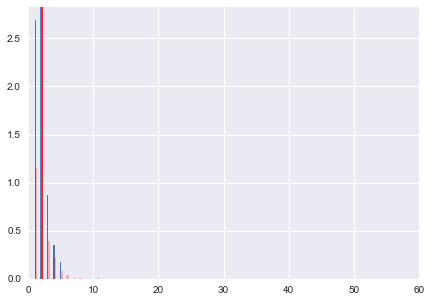

hour= 13
feature event_during_3h_aft
28005


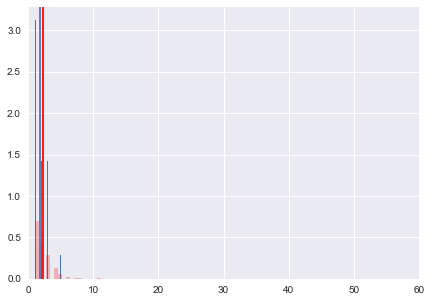

hour= 14
feature event_during_4h_aft
28005


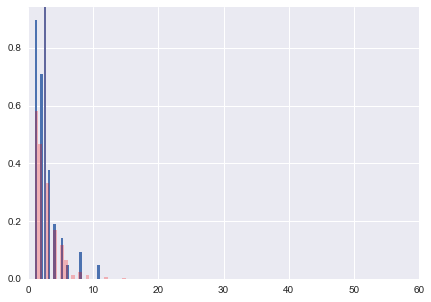

hour= 14
feature event_during_5h_aft
28005


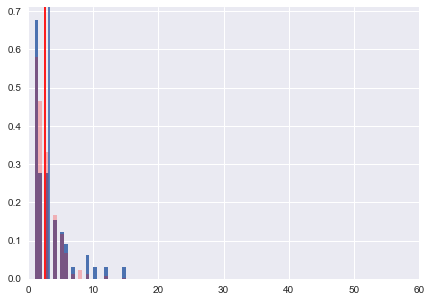

hour= 18
feature event_1h_aft
28005


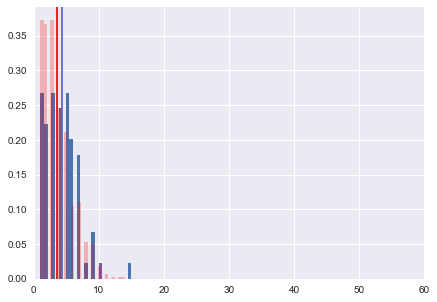

hour= 19
feature event_2h_aft
28005


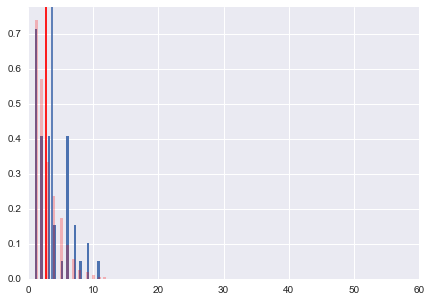

hour= 20
feature event_3h_aft
28005


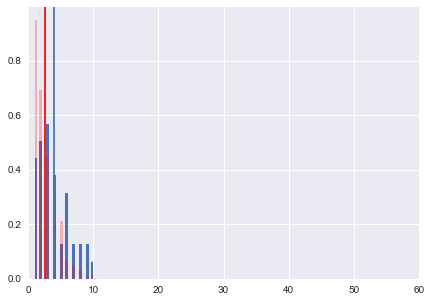

hour= 12
feature event_during_2h_aft
27999


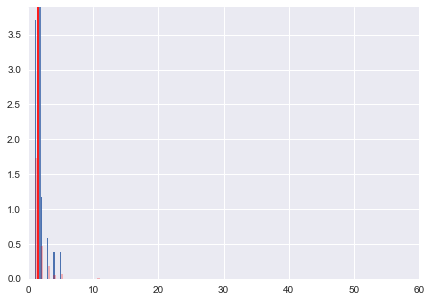

hour= 13
feature event_during_3h_aft
27999


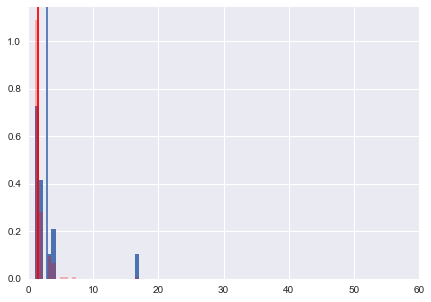

hour= 13
feature event_during_4h_aft
27999


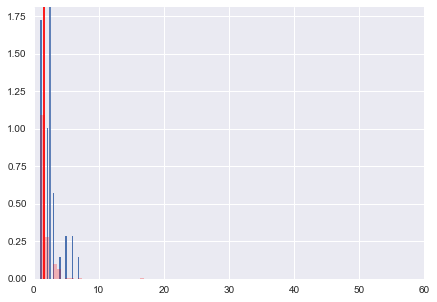

hour= 15
feature event_during_5h_aft
27999


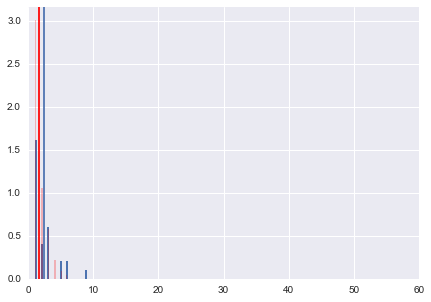

hour= 18
feature event_1h_aft
27999


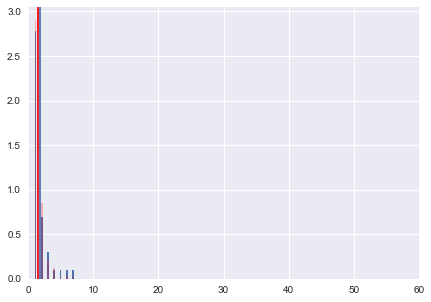

hour= 15
feature event_2h_aft
27999


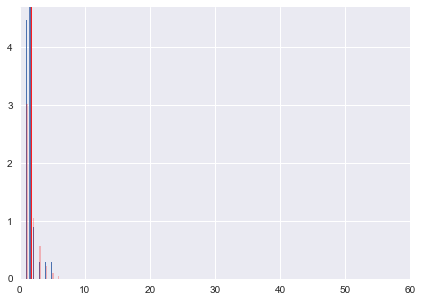

hour= 16
feature event_3h_aft
27999


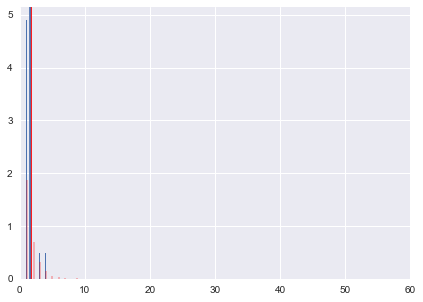

-----------------------------------------------------------------
['Royal Arena']
hour= 22
feature event_during_2h_aft
30942


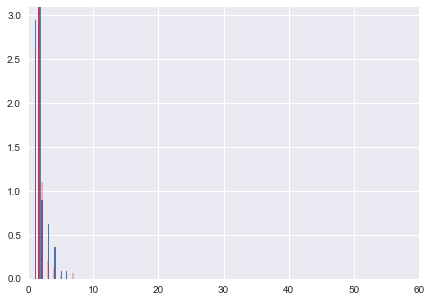

hour= 15
feature event_during_3h_aft
30942


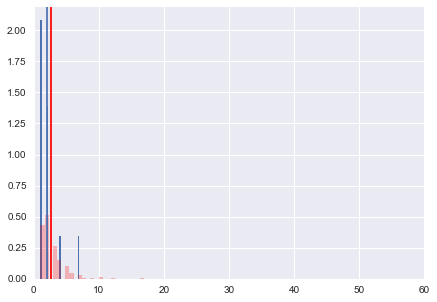

hour= 22
feature event_during_4h_aft
30942


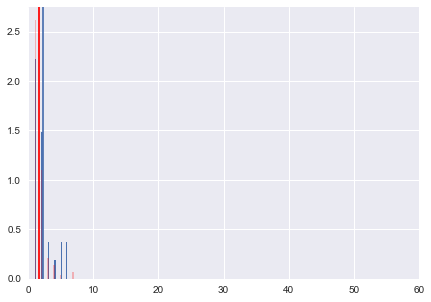

hour= 23
feature event_during_5h_aft
30942


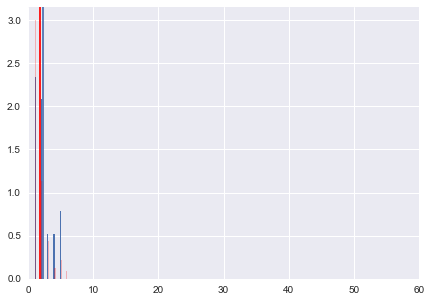

hour= 23
feature event_1h_aft
30942


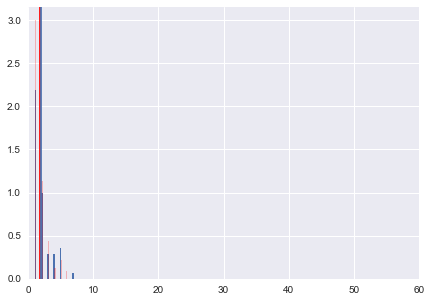

hour= 23
feature event_2h_aft
30942


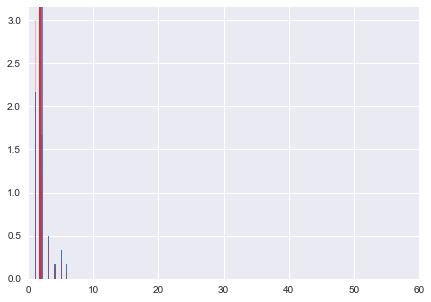

hour= 16
feature event_3h_aft
30942


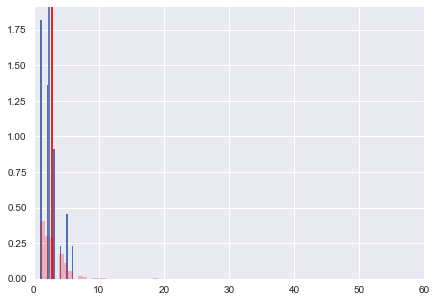

hour= 17
feature event_during_2h_aft
30941


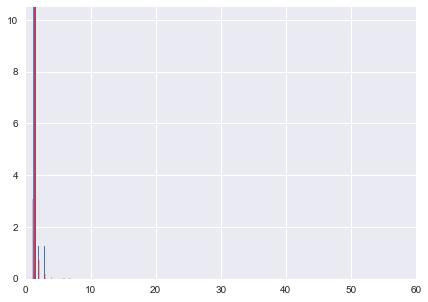

hour= 18
feature event_during_3h_aft
30941


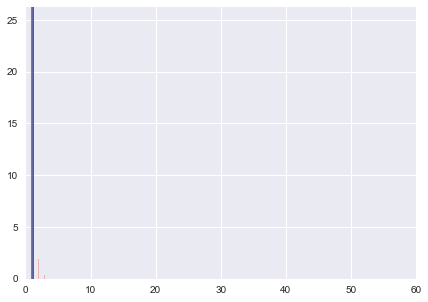

hour= 19
feature event_during_4h_aft
30941


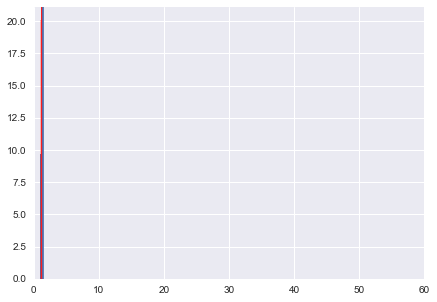

hour= 20
feature event_during_5h_aft
30941


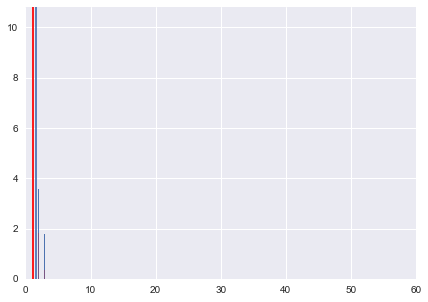

hour= 22
feature event_1h_aft
30941


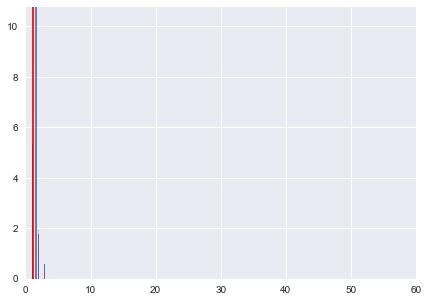

hour= 18
feature event_2h_aft
30941


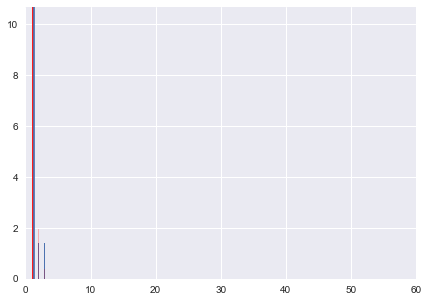

hour= 19
feature event_3h_aft
30941


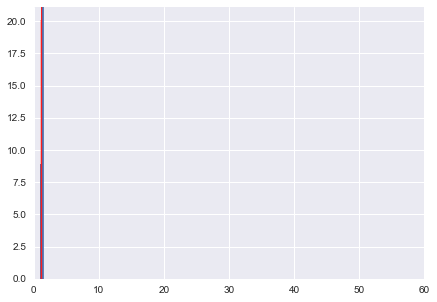

hour= 17
feature event_during_2h_aft
46743


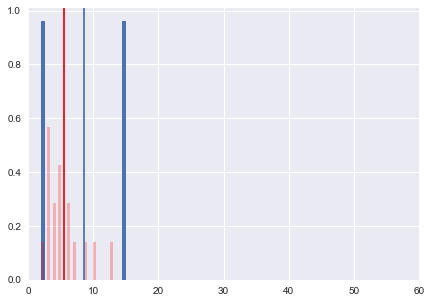

hour= 19
feature event_during_3h_aft
46743


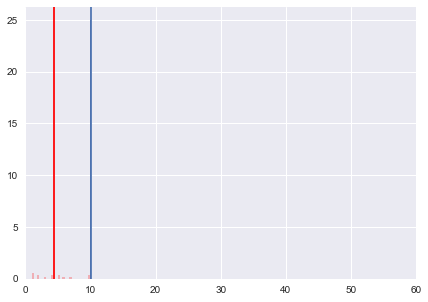

hour= 19
feature event_during_4h_aft
46743


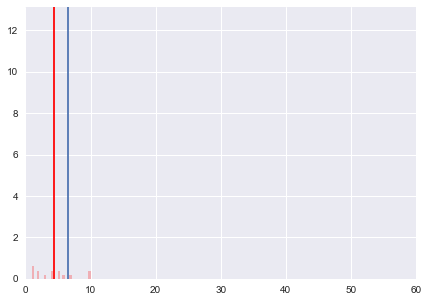

hour= 21
feature event_during_5h_aft
46743


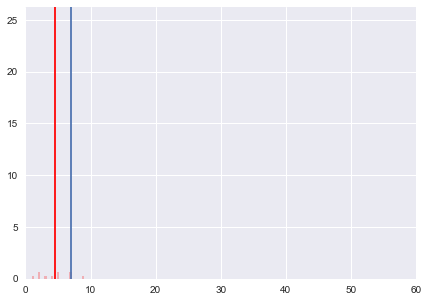

hour= 17
feature event_1h_aft
46743


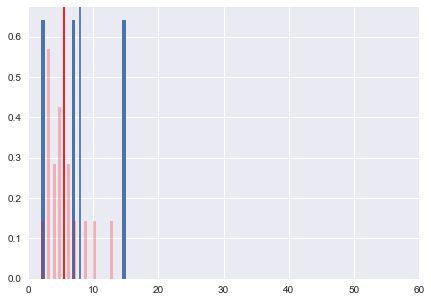

hour= 19
feature event_2h_aft
46743


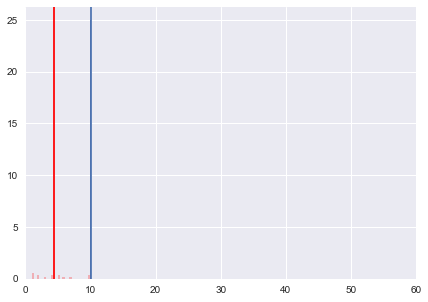

hour= 19
feature event_3h_aft
46743


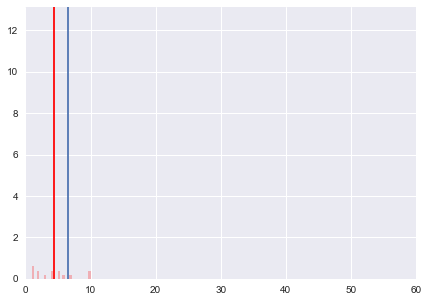

-----------------------------------------------------------------
['DR Koncerthuset']
hour= 22
feature event_during_2h_aft
27548


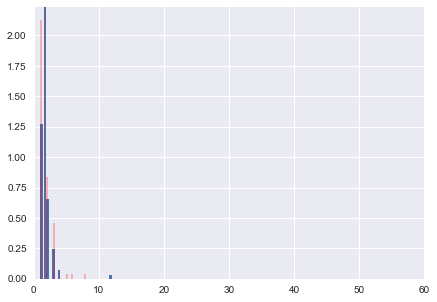

hour= 23
feature event_during_3h_aft
27548


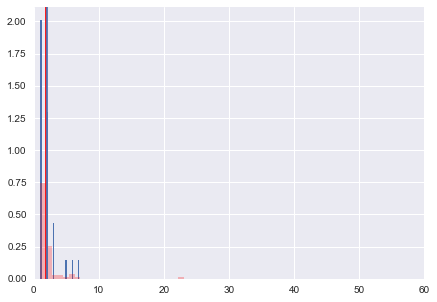

hour= 23
feature event_during_4h_aft
27548


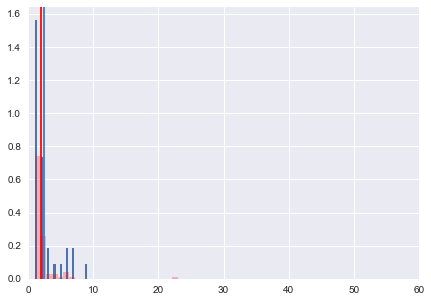

hour= 15
feature event_during_5h_aft
27548


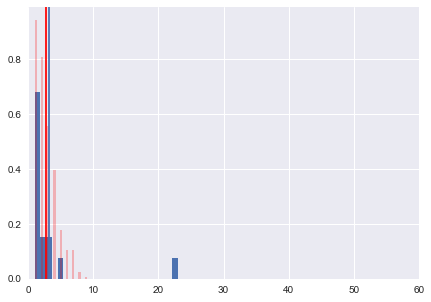

hour= 23
feature event_1h_aft
27548


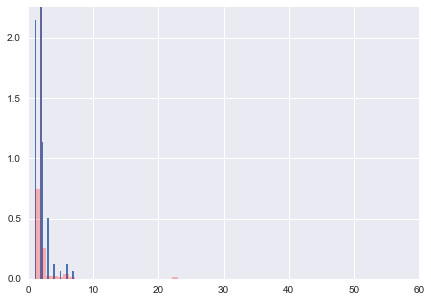

hour= 23
feature event_2h_aft
27548


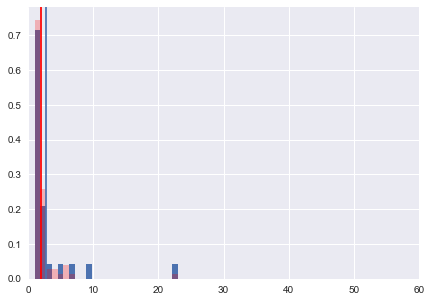

hour= 12
feature event_3h_aft
27548


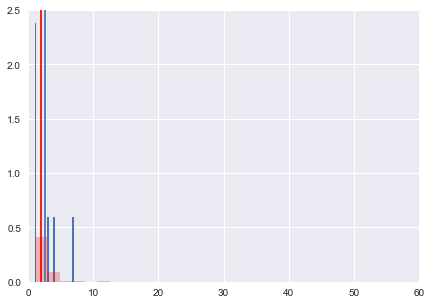

hour= 21
feature event_during_2h_aft
900


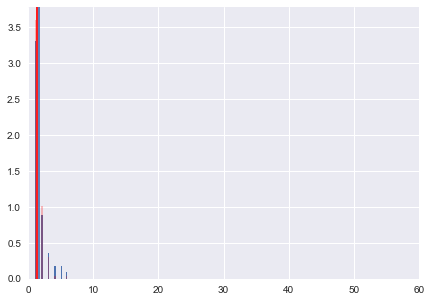

hour= 23
feature event_during_3h_aft
900


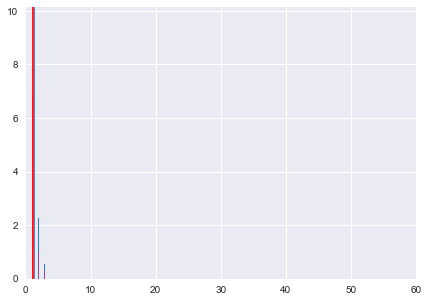

hour= 23
feature event_during_4h_aft
900


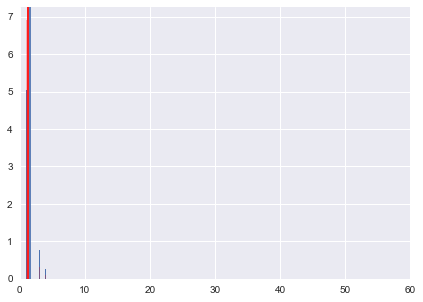

hour= 15
feature event_during_5h_aft
900


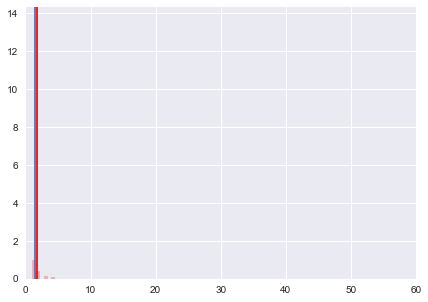

hour= 23
feature event_1h_aft
900


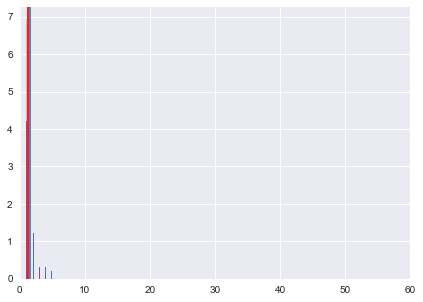

hour= 23
feature event_2h_aft
900


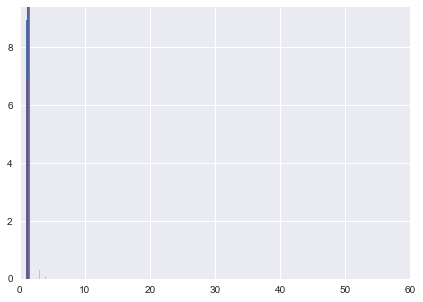

hour= 20
feature event_3h_aft
900


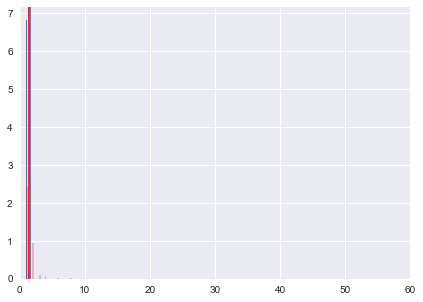

hour= 21
feature event_during_2h_aft
860


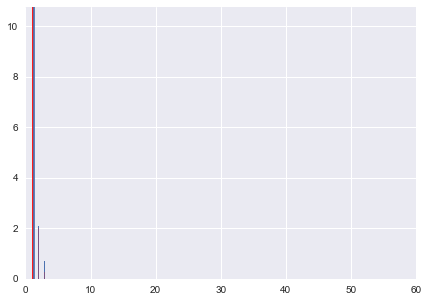

hour= 22
feature event_during_3h_aft
860


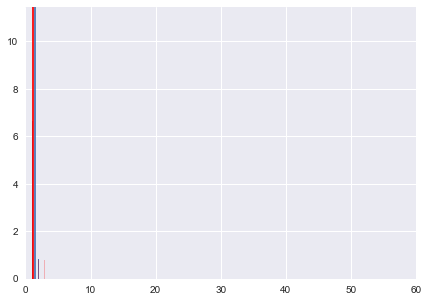

hour= 23
feature event_during_4h_aft
860


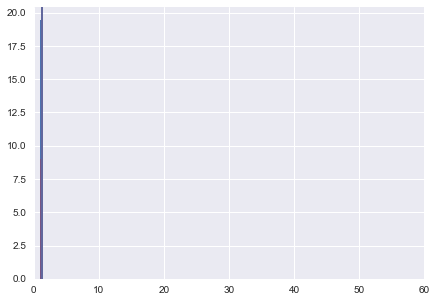

hour= 16
feature event_during_5h_aft
860


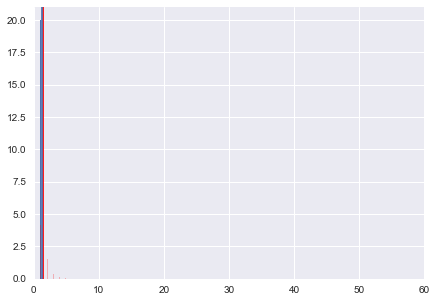

hour= 22
feature event_1h_aft
860


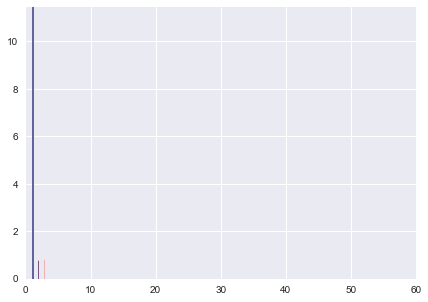

hour= 23
feature event_2h_aft
860


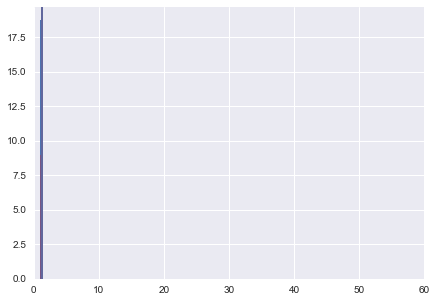

hour= 17
feature event_3h_aft
860


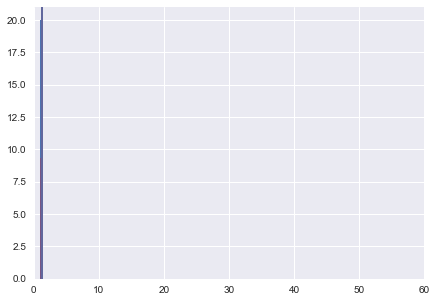

In [15]:
for dataf in dfs:
    print("-----------------------------------------------------------------")
    print(dataf.PoiName.unique())
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            try:
                av=dataframe['hours'][dataframe[c]==1].mode().values
                print("hour=",av[0])
                print("feature",c)
                print(st)
                plt.hist(dataframe['BoardingPassengerCount'][dataframe[c]==1],normed=True,bins=25)
                plt.hist(dataframe.BoardingPassengerCount[dataframe['hours']==av[0]],normed=True,bins=25,fc=(1, 0, 0, 0.25))
                plt.axvline(x=dataframe.BoardingPassengerCount[dataframe['hours']==av[0]].mean(),color='r')
                plt.axvline(x=dataframe['BoardingPassengerCount'][dataframe[c]==1].mean())
                plt.xlim(0,60)
        #         plt.ylim(0,0.7)
                plt.show()
            except:
                print(st)

In [22]:
for dataf in dfs:
    print("-----------------------------------------------------------------")
    print(dataf.PoiName.unique())
    print("Stops=", dataf.StopPointId.unique())
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            try:
#                 
                avT=dataframe['hours'][dataframe[c]==1].mode().values
        #         avT=int(dataframe['hours'][dataframe[c]==1].mean())
                avN=dataframe.BoardingPassengerCount[dataframe['hours']==avT[0]].mean()
                avE=dataframe['BoardingPassengerCount'][dataframe[c]==1].mean()
                avN=round(avN,1)
                avE=round(avE,1)
                if (avE-avN)>1:
                    print(avT,st,c,"ev=",avE,"Normal=",avN,"difference", round(avE-avN,1))
            except:
                print(st)

-----------------------------------------------------------------
['Vega']
Stops= [1547 1586 7081]
[23] 1547 event_during_3h_aft ev= 5.7 Normal= 4.4 difference 1.3
[23] 1547 event_during_4h_aft ev= 6.1 Normal= 4.4 difference 1.7
[23] 1547 event_1h_aft ev= 6.4 Normal= 4.4 difference 2.0
[23] 1547 event_2h_aft ev= 5.6 Normal= 4.4 difference 1.2
[19 23] 1547 event_3h_aft ev= 4.8 Normal= 3.5 difference 1.3
1586
7081
-----------------------------------------------------------------
['Forum']
Stops= [  678   715 50822]
[11] 678 event_during_2h_aft ev= 10.7 Normal= 6.3 difference 4.4
[12] 678 event_during_3h_aft ev= 10.4 Normal= 8.7 difference 1.7
[12 13] 678 event_during_4h_aft ev= 11.7 Normal= 8.7 difference 3.0
[13 14] 678 event_during_5h_aft ev= 15.7 Normal= 10.4 difference 5.3
[19] 678 event_2h_aft ev= 13.3 Normal= 10.6 difference 2.7
[20] 678 event_3h_aft ev= 11.5 Normal= 10.2 difference 1.3
[11] 715 event_during_2h_aft ev= 4.5 Normal= 3.2 difference 1.3
[14] 715 event_during_5h_aft ev=

# Parken 1,2 h after 

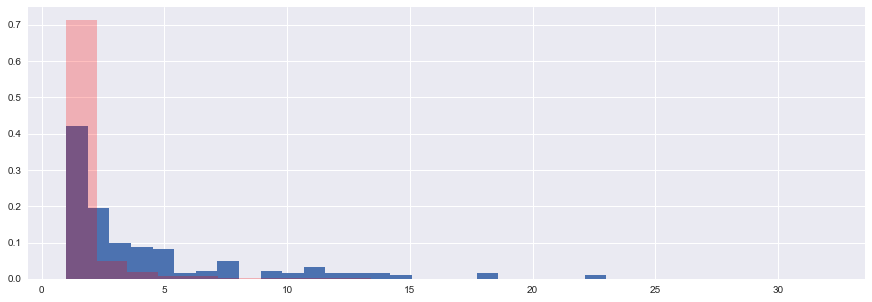

In [38]:
parken=dfs[2]
parken['isEvent']=parken['event_1h_aft']+parken['event_2h_aft']
parken_ev=parken[parken['isEvent']>0]

avT1=np.percentile(parken_ev['hours'],25)
avT2=np.percentile(parken_ev['hours'],75)

parkenN=parken[parken['hours']>=avT1]
parkenN=parken[parken['hours']<=avT2]

plt.hist(parken_ev['BoardingPassengerCount'],normed=True,bins=25);
plt.hist(parkenN.BoardingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

# Bella 1,2,3 h after 

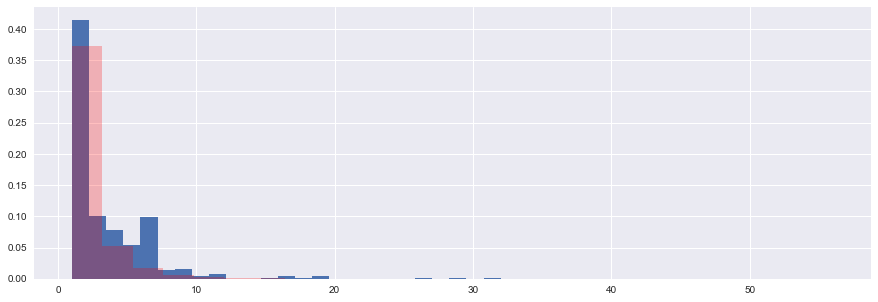

In [39]:
bella=dfs[3]
bella['isEvent']=bella['event_1h_aft']+bella['event_2h_aft']+bella['event_3h_aft']
bella_ev=bella[bella['isEvent']>0]

avT1=np.percentile(bella_ev['hours'],25)
avT2=np.percentile(bella_ev['hours'],75)

bellaN=bella[bella['hours']>=avT1]
bellaN=bella[bella['hours']<=avT2]

plt.hist(bella_ev['BoardingPassengerCount'],normed=True,bins=25);
plt.hist(bellaN.BoardingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

# Forum 3,4,5 h after start

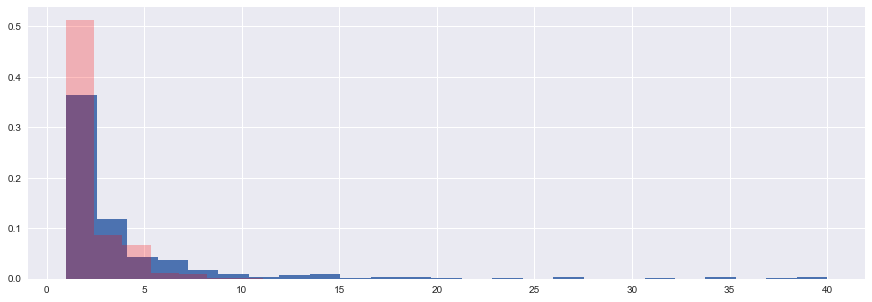

In [43]:
forum=dfs[3]
forum['isEvent']=forum['event_during_3h_aft']+forum['event_during_4h_aft']+forum['event_during_5h_aft']

forum_ev=forum[forum['isEvent']>0]

avT1=np.percentile(forum_ev['hours'],25)
avT2=np.percentile(forum_ev['hours'],75)

forumN=forum[forum['hours']>=avT1]
forumN=forum[forum['hours']<=avT2]

plt.hist(forum_ev['BoardingPassengerCount'],normed=True,bins=25);
plt.hist(forumN.BoardingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

# Vega 1,2 h after

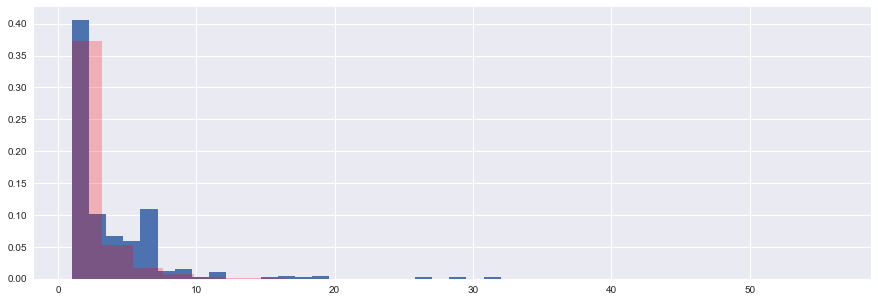

In [45]:
vega=dfs[3]
vega['isEvent']=vega['event_1h_aft']+vega['event_2h_aft']
vega_ev=vega[vega['isEvent']>0]

avT1=np.percentile(vega_ev['hours'],25)
avT2=np.percentile(vega_ev['hours'],75)

vegaN=vega[vega['hours']>=avT1]
vegaN=vega[vega['hours']<=avT2]

plt.hist(vega_ev['BoardingPassengerCount'],normed=True,bins=25);
plt.hist(vegaN.BoardingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

In [5]:
al['isEvent']=al['event_3h_aft']+al['event_4h_aft']+al['event_5h_aft']+al['event_6h_aft']+al['event_7h_aft']+al['event_8h_aft']+al['event_9h_aft']             
al['isEvent']= al['isEvent'].apply(lambda x: 1 if x > 0 else 0)

In [7]:
#average arrivals per stop
for name in al.PoiName.unique():
    al_ve=al[al['PoiName']==name]
    for st in al_ve.StopPointId.unique():
        al_st=al_ve[al_ve['StopPointId']==st]
        print("name: ",name)
        print("stop: ", st)
        print("mean: ", np.mean(al_st.BoardingPassengerCount))
        print("------------------------------------")

name:  Vega
stop:  1547
mean:  4.0231654347329115
------------------------------------
name:  Vega
stop:  1586
mean:  1.8321225729758288
------------------------------------
name:  Vega
stop:  7081
mean:  1.4441108545034642
------------------------------------
name:  Forum
stop:  678
mean:  9.634279691719913
------------------------------------
name:  Forum
stop:  715
mean:  2.851576640945032
------------------------------------
name:  Forum
stop:  50822
mean:  0.573170731707317
------------------------------------
name:  Bella Center
stop:  28000
mean:  2.1908200734394123
------------------------------------
name:  Bella Center
stop:  28005
mean:  2.6259670366633032
------------------------------------
name:  Bella Center
stop:  27999
mean:  1.397332592386774
------------------------------------
name:  DR Koncerthuset
stop:  900
mean:  1.4593843098311818
------------------------------------
name:  DR Koncerthuset
stop:  27548
mean:  2.0861125816128463
---------------------------------

In [8]:
df_one_venue=[]
for venue in al['PoiName'].unique():
    df=al[al['PoiName']==venue]
    df_one_venue.append(df)

In [10]:
al.columns

Index(['BoardingPassengerCount', 'BoardingPassengerCount_lag1',
       'BoardingPassengerCount_lag2', 'BoardingPassengerCount_lag3',
       'BoardingPassengerCount_lag4', 'BoardingPassengerCount_lag5',
       'Distance', 'PoiName', 'StopPointId', 'TimeStep', 'Time_difference',
       'event_3h_aft', 'event_4h_aft', 'event_5h_aft', 'event_6h_aft',
       'event_7h_aft', 'event_8h_aft', 'event_9h_aft', 'event_at_midnight',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'day', 'hours', 'h_0', 'h_1', 'h_2', 'h_3', 'h_4',
       'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13',
       'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22',
       'h_23', 'isWeekend', 'Distance_venue_trainSt', 'tod_0_to_2',
       'tod_3_to_5', 'tod_6_to_8', 'tod_9_to_11', 'tod_12_to_14',
       'tod_15_to_17', 'tod_18_to_20', 'tod_21_to_23', 'isEvent'],
      dtype='object')

In [12]:
#Groupe to have all the stops per each venue

list_al_ven=[]
for name in al.PoiName.unique():
    al_ve=al[al['PoiName']==name]
    list_al_ven.append(al_ve)
    
    
list_al_grouped=[]
for df in list_al_ven:
    df1=df.groupby('TimeStep')[['BoardingPassengerCount', 'BoardingPassengerCount_lag1',
       'BoardingPassengerCount_lag2', 'BoardingPassengerCount_lag3',
       'BoardingPassengerCount_lag4', 'BoardingPassengerCount_lag5']].sum()

    df2=df.groupby('TimeStep')[['event_3h_aft', 'event_4h_aft', 'event_5h_aft', 'event_6h_aft',
       'event_7h_aft', 'event_8h_aft', 'event_9h_aft',
                                'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7'
                                , 'h_0', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5',
       'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14',
       'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23',
       'isWeekend',"isEvent",
        'tod_0_to_2', 'tod_3_to_5', 'tod_6_to_8',
       'tod_9_to_11', 'tod_12_to_14', 'tod_15_to_17', 'tod_18_to_20',
       'tod_21_to_23',"hours"
                               ]].mean()
    
    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    
    df_grouped=pd.merge(df1,df2, on='TimeStep')
    
    list_al_grouped.append(df_grouped)
    
for i in range(6):
    list_al_grouped[i]['PoiName']=list_al_ven[i]['PoiName'][0]

In [52]:
for df in list_al_grouped:
    print(df.PoiName.iloc[0])
    print("Length:",len(df))
    print("Mean passengers:",df.BoardingPassengerCount.mean())
    print("\n")

Vega
Length: 13813
Mean passengers: 5.279084920002896


Forum
Length: 15554
Mean passengers: 11.333740516908835


Bella Center
Length: 11993
Mean passengers: 3.864671058117235


DR Koncerthuset
Length: 8581
Mean passengers: 2.552849318261275


Royal Arena
Length: 5712
Mean passengers: 2.241596638655462


Parken
Length: 5723
Mean passengers: 2.0781058885200068




In [15]:
list_event_per_ven=[]
for name in ev.venue_unique.unique():
    ev_1ve=ev[ev['venue_unique']==name]
    list_event_per_ven.append(ev_1ve)

In [34]:
print("Number of events:")
for df in list_event_per_ven:
    print(df.venue_unique.iloc[0],":",len(df))
    print("\n")

Number of events:
DrKoncerthuset : 438


ForumCopenhagen : 116


RoyalArena : 83


Vega : 579


TeliaParken : 176


BellaCenter : 88




### Distribution Analysis

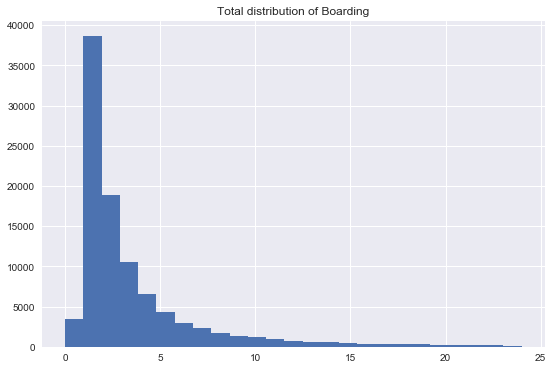

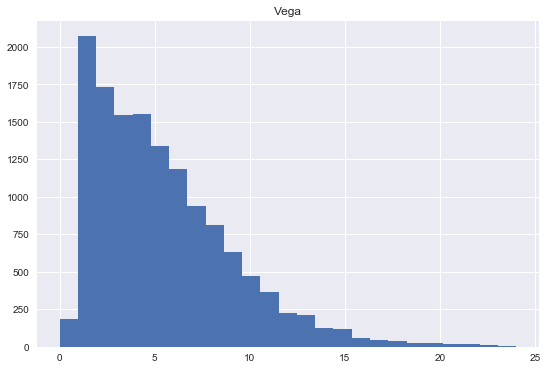

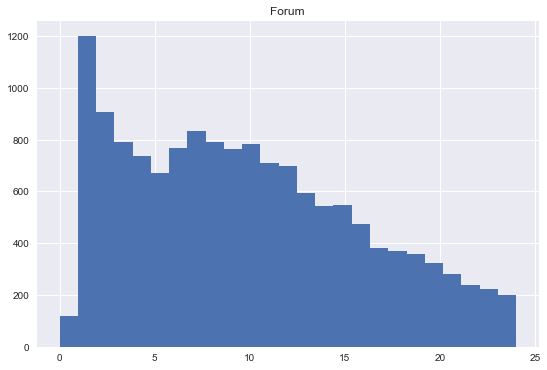

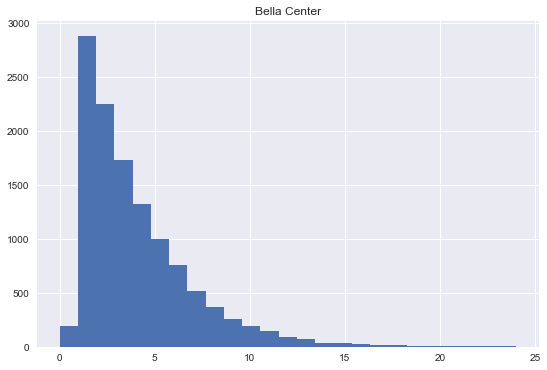

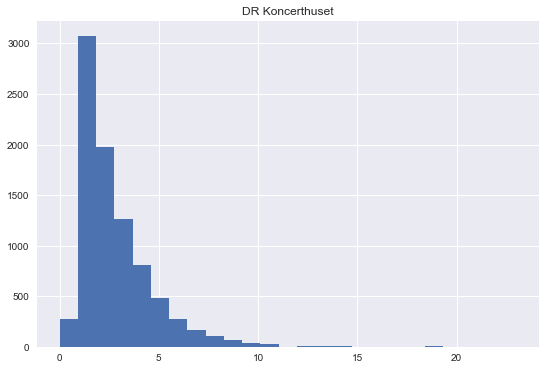

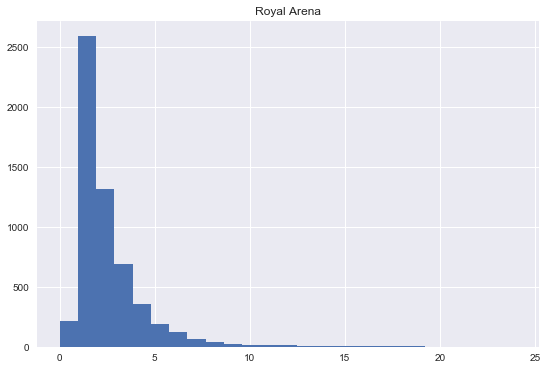

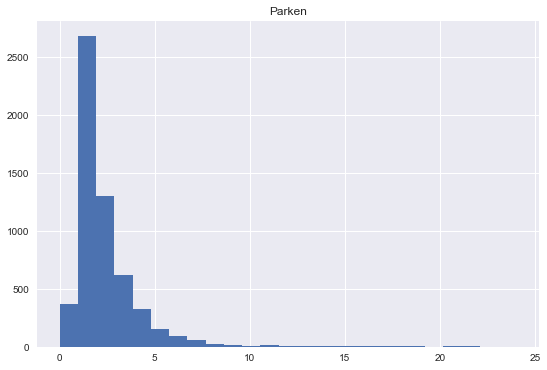

In [32]:
plt.rcParams['figure.figsize'] = (9, 6)

# distribution of alighting 
plt.hist(al.BoardingPassengerCount[al['BoardingPassengerCount']<25],bins=25)
plt.title("Total distribution of Boarding")
plt.show()

for df in list_al_grouped:
    plt.hist(df.BoardingPassengerCount[df['BoardingPassengerCount']<25],bins=25)
    plt.title(df.PoiName.iloc[0])
    plt.show()

# Analysis Abnormal Values

In [19]:
ev17=ev[ev['starting_time'].dt.year==2017]
ev17=ev17[ev17['starting_time'].dt.month==11]
ev17=ev17[ev17['starting_time'].dt.day==11]
ev17

description  \
404   modeselektor-dr-koncerthuset-studie-1   
1156                carl-emil-petersen-vega   
1374                                   None   
1375                                   None   
1468                               Bogforum   
1469                               Bogforum   

                                              eventname       starting_time  \
404   Modeselektor + Support: Kenton Slash Demon / A... 2017-11-11 22:00:00   
1156                          Carl Emil Petersen - VEGA 2017-11-11 20:00:00   
1374  Denmark vs Republic of Ireland - World Cup 201... 2017-11-11 00:00:00   
1375  Denmark vs Republic of Ireland, Russia 2018 qu... 2017-11-11 20:45:00   
1468                                           Bogforum 2017-11-11 10:00:00   
1469                                           Bogforum 2017-11-11 14:00:00   

                              venue    venue_unique        deltaTime  
404                 DR Koncerthuset  DrKoncerthuset  7 days 01:00:00  
1156                           VEGA            Vega  1 days 00:00:00  
1374  Telia Parken (Parken Stadium)     TeliaParken  5 days 06:00:00  
1375  Telia Parken (Parken Stadium)     TeliaParken  0 days 20:45:00  
1468                    BellaCenter     BellaCenter                0  
1469                    BellaCenter     BellaCenter                0

name:  Vega
distribution of values


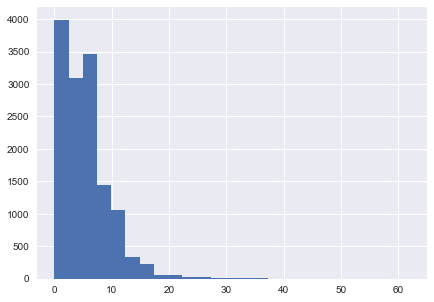

distribution of values after the 99th percentile


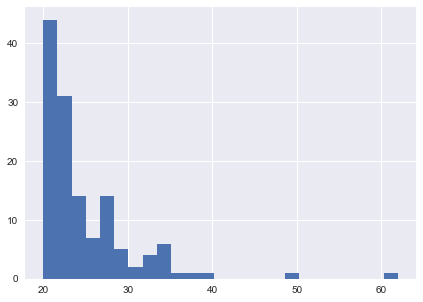

frequency of the values, after the 99th perc 
Counter({20: 24, 21: 20, 22: 17, 23: 14, 27: 9, 24: 7, 26: 7, 25: 7, 28: 5, 35: 5, 33: 4, 30: 3, 29: 2, 31: 2, 37: 1, 34: 1, 62: 1, 49: 1, 40: 1, 36: 1})
date of these <outlyer>
                 TimeStep  BoardingPassengerCount  isEvent
1446  2017-02-09 08:30:00                      28        0
2171  2017-02-27 22:30:00                      35        0
2222  2017-03-01 08:00:00                      37        0
2684  2017-03-12 22:30:00                      33        1
2720  2017-03-13 22:30:00                      34        1
2846  2017-03-17 08:00:00                      28        0
3003  2017-03-21 08:00:00                      30        0
4387  2017-04-27 08:00:00                      30        0
4425  2017-04-28 08:30:00                      33        0
4453  2017-04-28 22:30:00                      29        1
4899  2017-05-10 22:30:00                      35        1
5571  2017-05-29 08:30:00                      30        0
5708  201

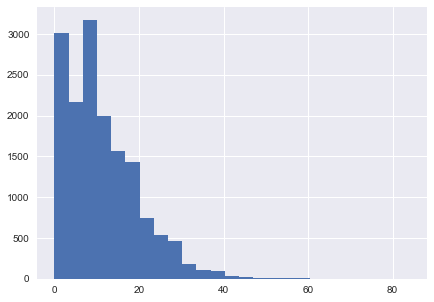

distribution of values after the 99th percentile


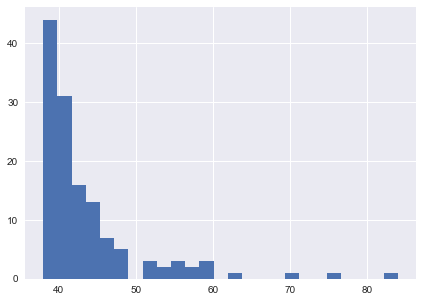

frequency of the values, after the 99th perc 
Counter({38: 23, 39: 21, 40: 16, 41: 15, 44: 9, 42: 8, 43: 8, 46: 5, 45: 4, 56: 3, 48: 3, 47: 2, 49: 2, 51: 2, 59: 2, 58: 2, 70: 1, 54: 1, 75: 1, 63: 1, 84: 1, 60: 1, 53: 1, 52: 1})
date of these <outlyer>
                 TimeStep  BoardingPassengerCount  isEvent
1584  2017-02-08 22:30:00                      56        1
1874  2017-02-15 16:30:00                      47        1
1916  2017-02-16 16:30:00                      44        0
1997  2017-02-18 14:00:00                      49        0
2140  2017-02-21 22:30:00                      70        1
2589  2017-03-04 16:00:00                      51        1
3119  2017-03-17 15:30:00                      45        0
3169  2017-03-18 18:00:00                      59        0
3999  2017-04-07 23:30:00                      56        1
4747  2017-04-25 11:00:00                      54        0
5375  2017-05-09 23:30:00                      46        0
5402  2017-05-10 16:30:00               

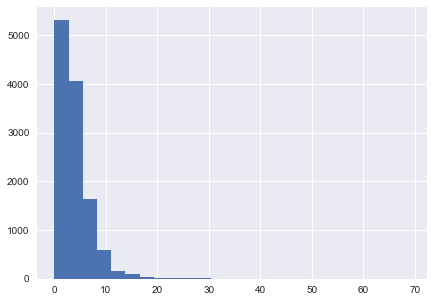

distribution of values after the 99th percentile


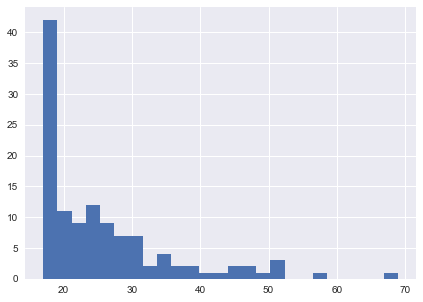

frequency of the values, after the 99th perc 
Counter({17: 18, 18: 13, 19: 11, 20: 7, 25: 7, 22: 5, 26: 5, 24: 5, 27: 4, 21: 4, 29: 4, 30: 4, 23: 4, 28: 3, 31: 3, 35: 3, 47: 2, 32: 2, 51: 2, 52: 1, 36: 1, 34: 1, 57: 1, 45: 1, 41: 1, 46: 1, 49: 1, 69: 1, 37: 1, 44: 1, 38: 1, 39: 1})
date of these <outlyer>
                 TimeStep  BoardingPassengerCount  isEvent
1392  2017-02-16 16:00:00                      29        1
1423  2017-02-17 16:00:00                      30        1
1425  2017-02-17 17:00:00                      30        1
1453  2017-02-18 14:30:00                      28        1
1455  2017-02-18 15:30:00                      31        1
1458  2017-02-18 17:00:00                      52        1
1807  2017-03-01 15:00:00                      35        1
1809  2017-03-01 16:00:00                      36        1
2745  2017-03-30 18:00:00                      28        1
7161  2017-08-12 13:30:00                      28        0
8917  2017-10-02 17:30:00                   

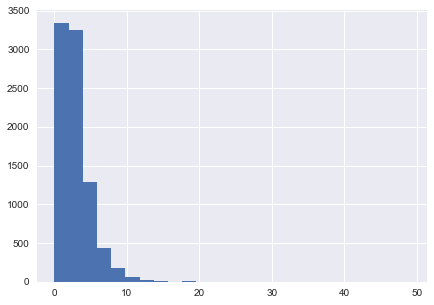

distribution of values after the 99th percentile


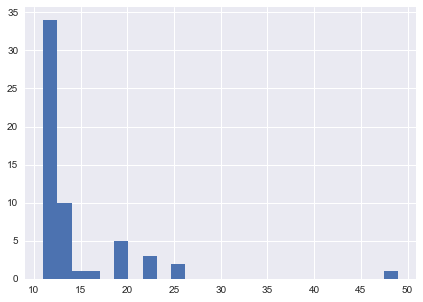

frequency of the values, after the 99th perc 
Counter({11: 23, 12: 11, 13: 6, 19: 4, 14: 4, 23: 2, 17: 1, 20: 1, 26: 1, 49: 1, 15: 1, 25: 1, 22: 1})
date of these <outlyer>
                TimeStep  BoardingPassengerCount  isEvent
1096 2017-02-17 12:00:00                      19        0
1368 2017-03-01 08:30:00                      13        0
1728 2017-03-15 23:30:00                      23        1
1737 2017-03-16 08:30:00                      14        0
1769 2017-03-17 11:30:00                      17        0
3511 2017-05-31 12:30:00                      13        0
4040 2017-06-23 11:00:00                      14        0
4925 2017-08-01 11:00:00                      19        0
5120 2017-08-10 09:00:00                      19        0
5313 2017-08-18 07:30:00                      13        0
5407 2017-08-22 10:30:00                      19        0
5623 2017-08-31 16:00:00                      13        0
5766 2017-09-06 15:00:00                      20        0
5843 2017-09-09

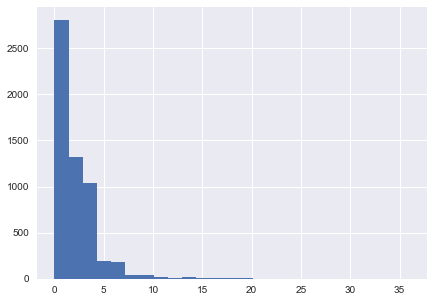

distribution of values after the 99th percentile


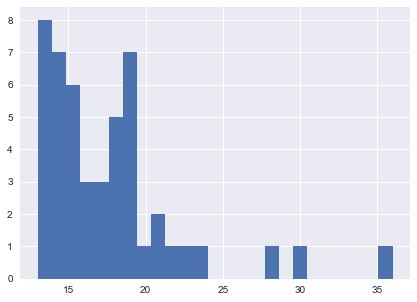

frequency of the values, after the 99th perc 
Counter({13: 8, 14: 7, 19: 7, 15: 6, 18: 5, 17: 3, 16: 3, 21: 2, 22: 1, 30: 1, 36: 1, 20: 1, 24: 1, 28: 1, 23: 1})
date of these <outlyer>
                TimeStep  BoardingPassengerCount  isEvent
154  2017-01-19 09:30:00                      22        0
191  2017-01-24 11:00:00                      30        0
514  2017-02-14 14:00:00                      21        0
1927 2017-04-28 09:30:00                      19        0
2035 2017-05-03 14:30:00                      36        0
2564 2017-05-29 09:00:00                      20        0
2668 2017-06-02 17:00:00                      19        0
2827 2017-06-10 10:30:00                      21        0
2913 2017-06-14 14:00:00                      19        0
3044 2017-06-20 13:30:00                      24        0
4085 2017-08-23 13:00:00                      28        0
4774 2017-11-07 16:00:00                      19        0
5424 2017-12-21 15:30:00                      19        0
542

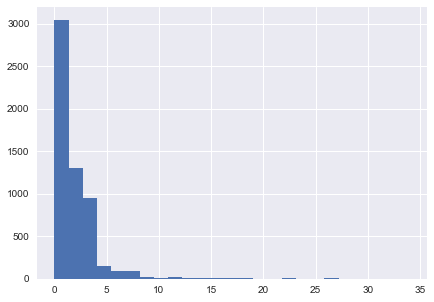

distribution of values after the 99th percentile


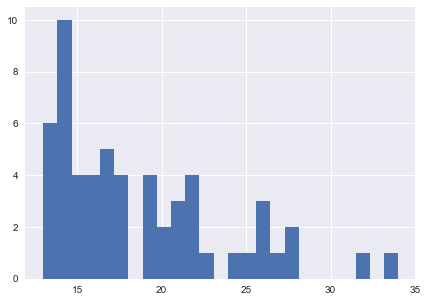

frequency of the values, after the 99th perc 
Counter({14: 10, 13: 6, 17: 5, 18: 4, 19: 4, 16: 4, 15: 4, 22: 4, 21: 3, 26: 3, 20: 2, 28: 2, 24: 1, 27: 1, 25: 1, 23: 1, 34: 1, 32: 1})
date of these <outlyer>
                TimeStep  BoardingPassengerCount  isEvent
810  2017-02-19 15:30:00                      21        1
1184 2017-03-12 20:00:00                      26        1
1600 2017-04-06 12:30:00                      21        0
1657 2017-04-09 20:00:00                      24        1
1959 2017-05-01 15:00:00                      21        1
1961 2017-05-01 16:00:00                      27        1
1962 2017-05-01 16:30:00                      26        1
1964 2017-05-01 17:30:00                      25        1
2182 2017-05-14 20:00:00                      22        0
3962 2017-08-29 12:30:00                      28        0
3975 2017-08-29 21:00:00                      26        1
4002 2017-08-30 21:00:00                      23        1
4024 2017-08-31 21:00:00               

In [39]:
plt.rcParams['figure.figsize'] = (7, 5)
for df in list_al_grouped:
    print("name: ",df['PoiName'].loc[0])
    print("distribution of values")
#     sns.distplot(df.BoardingPassengerCount)
    plt.hist(df.BoardingPassengerCount, bins=25)
    plt.show()
    print("distribution of values after the 99th percentile")
    plt.hist(df['BoardingPassengerCount'][df['BoardingPassengerCount']>np.percentile(df.BoardingPassengerCount, 99)], bins=25)
    plt.show()
    print("frequency of the values, after the 99th perc ")
    counter=collections.Counter(df['BoardingPassengerCount'][df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99)])
    print(counter)
    print("date of these <outlyer>")
    print(df[['TimeStep', 'BoardingPassengerCount', 'isEvent']][df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99.7)])
    print(len(df[df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99.7)]))
    print(sum(df['isEvent'][df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99.7)]))
    print(sum(df['isEvent'][df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99.7)])*100/len(df[df['BoardingPassengerCount']> np.percentile(df.BoardingPassengerCount, 99.7)]))
    
    print("================================================================================================")

# Plot arrivals on event date 

In [21]:
allAlighting=pd.concat(list_al_grouped)

In [22]:
allAlighting['hours']=allAlighting['TimeStep'].dt.hour

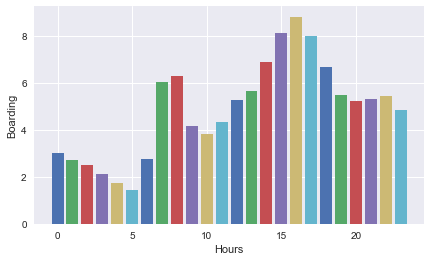

In [28]:
plt.rcParams['figure.figsize'] = (7, 4)

for i in range(24):
    plt.bar(i,np.mean(allAlighting['BoardingPassengerCount'][allAlighting['hours']==i]))
    plt.xlabel("Hours")
    plt.ylabel("Boarding")
plt.show()

In [25]:
ven_name_pass=[]

for i in range(len(list_al_grouped)):
    ven_name_pass.append(list_al_grouped[i]['PoiName'][0])
    
ven_name_ev=ev.venue_unique.unique()

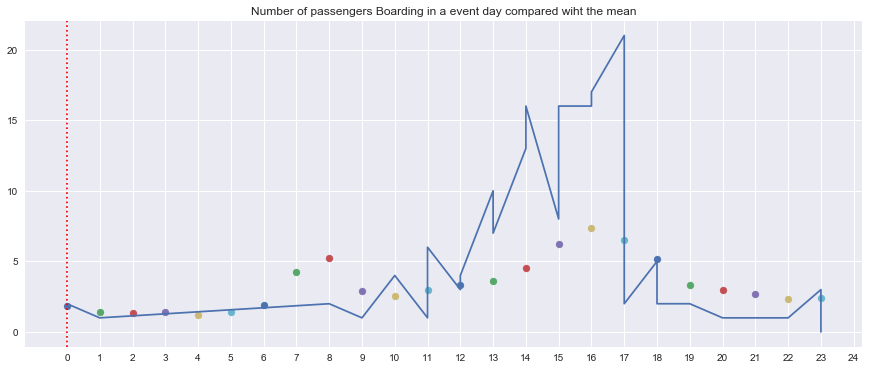

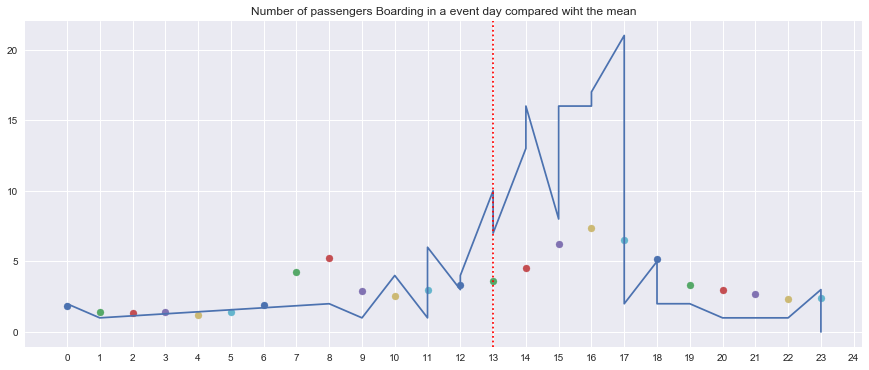

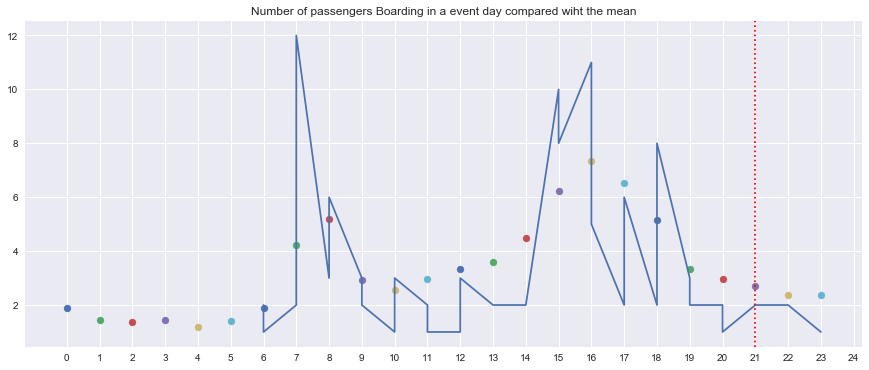

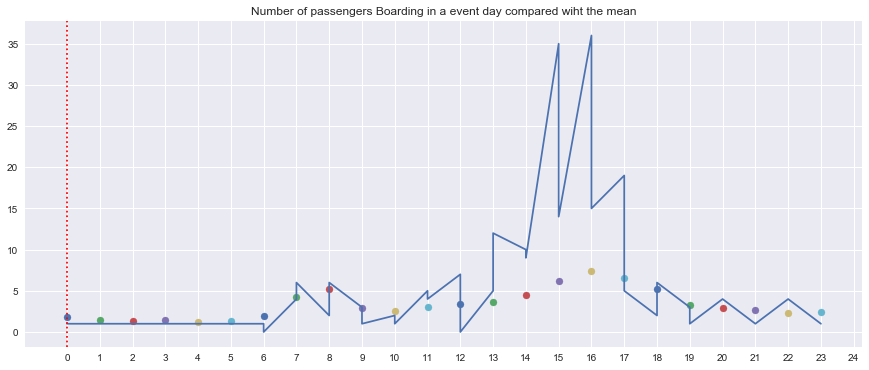

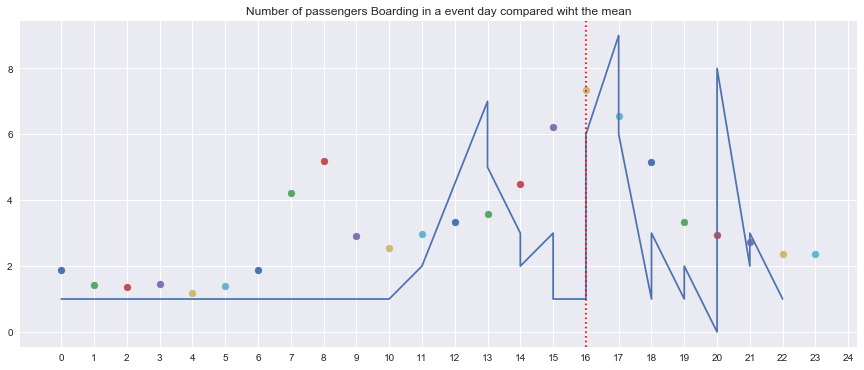

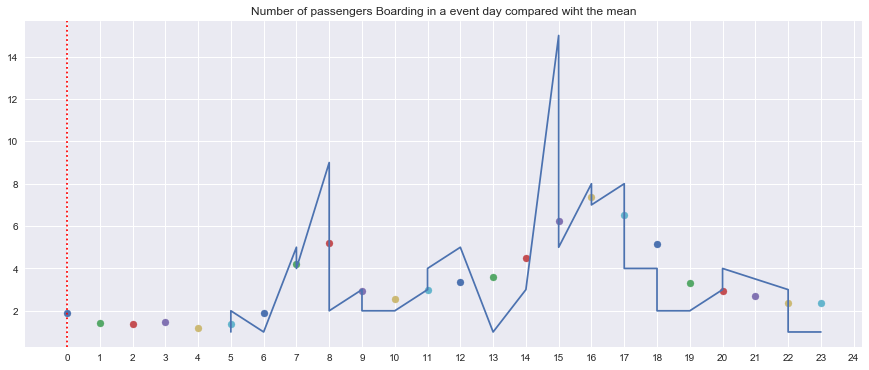

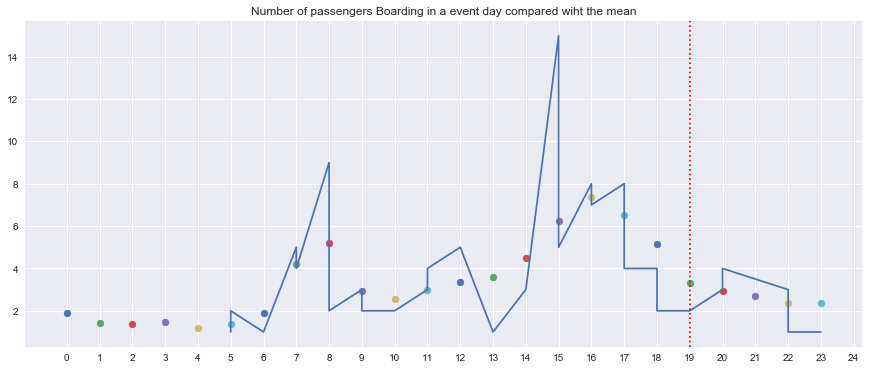

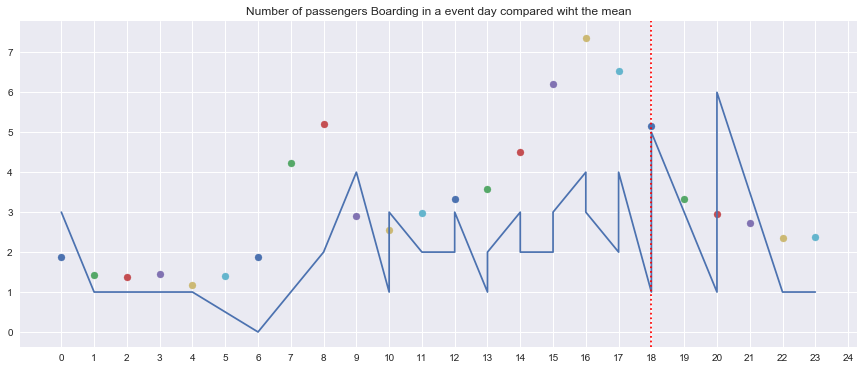

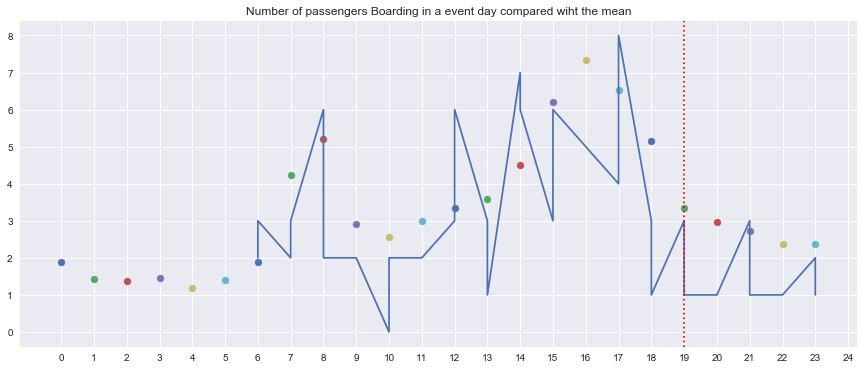

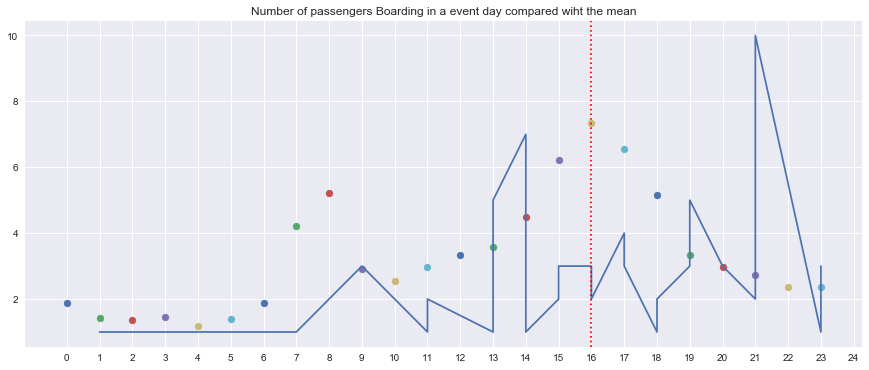

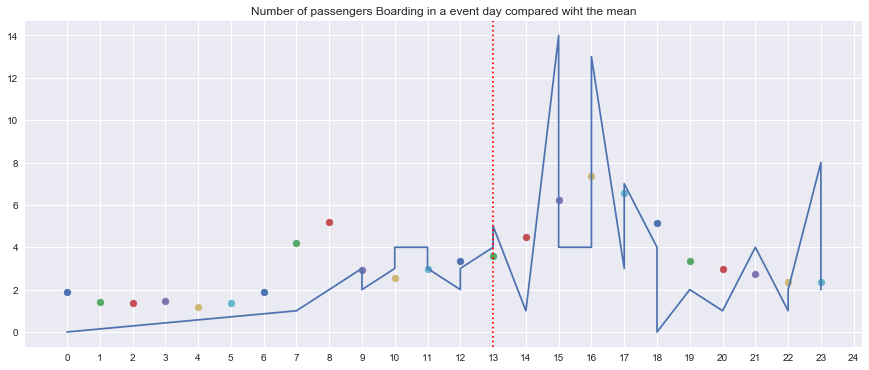

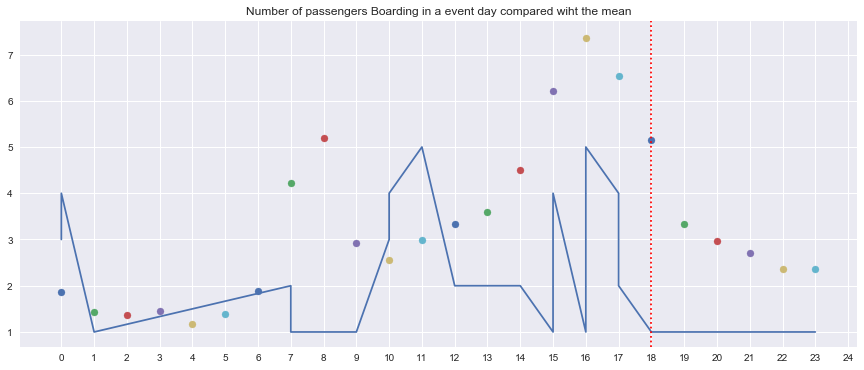

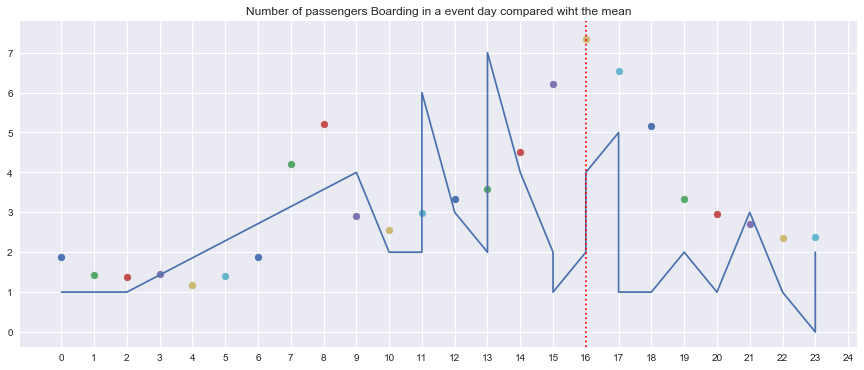

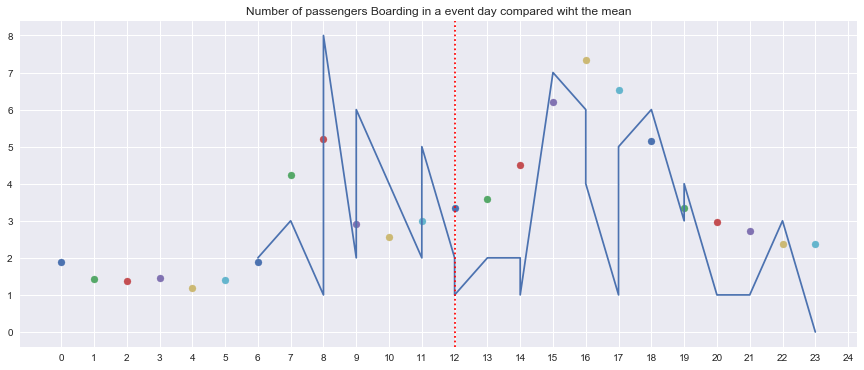

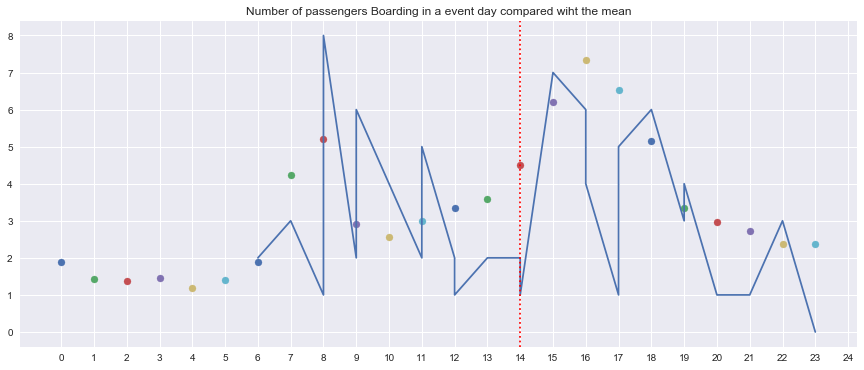

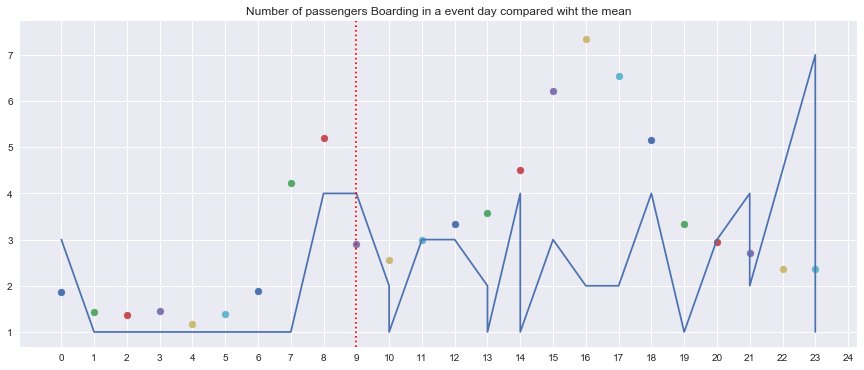

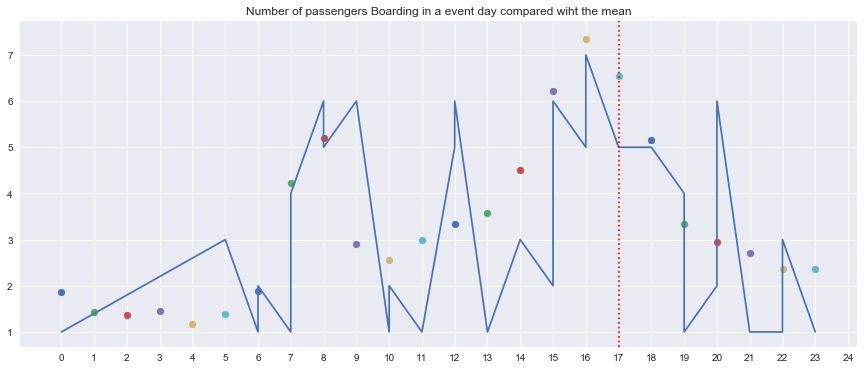

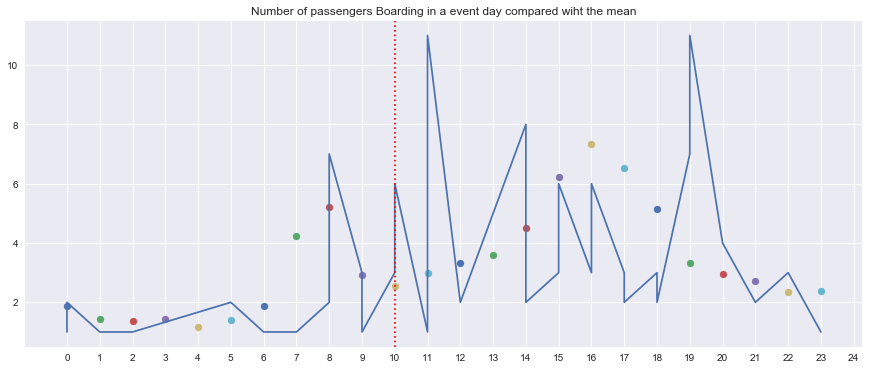

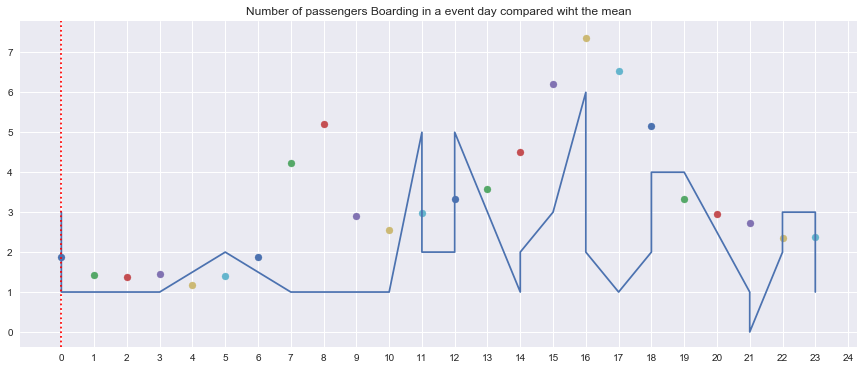

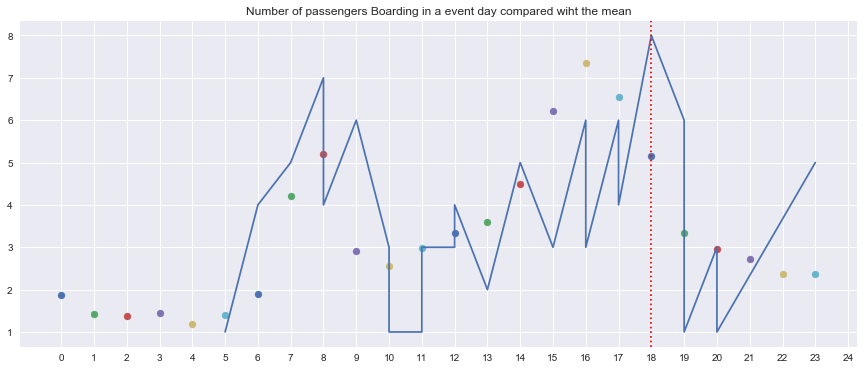

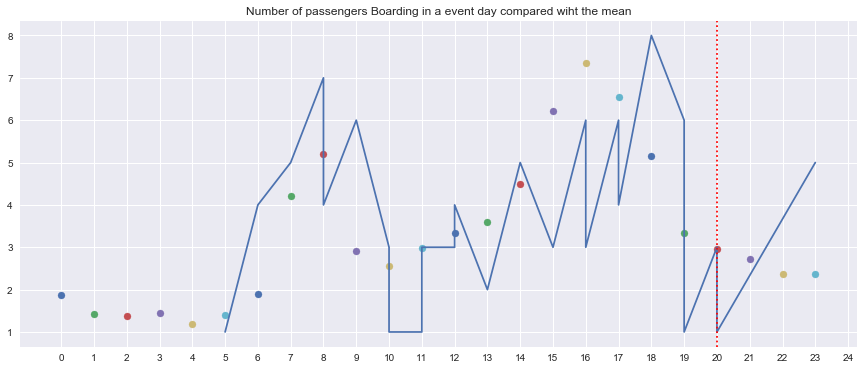

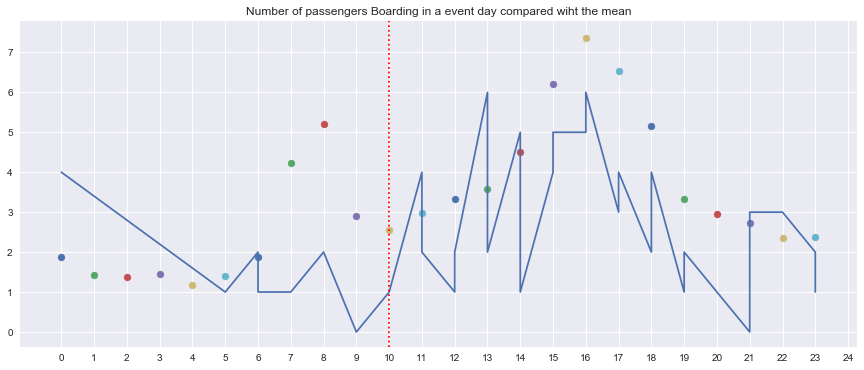

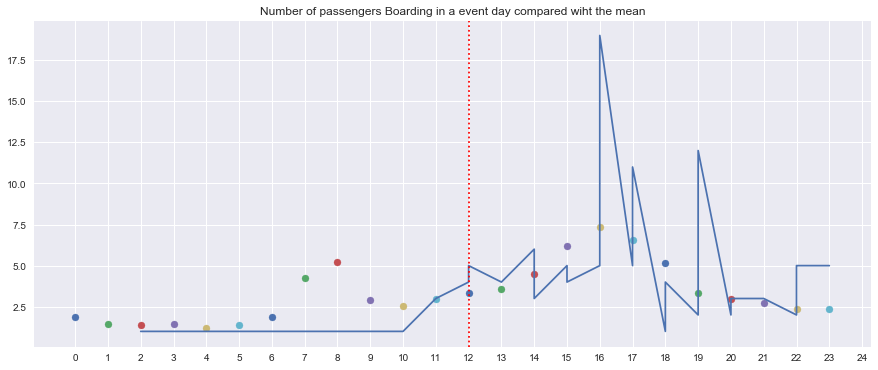

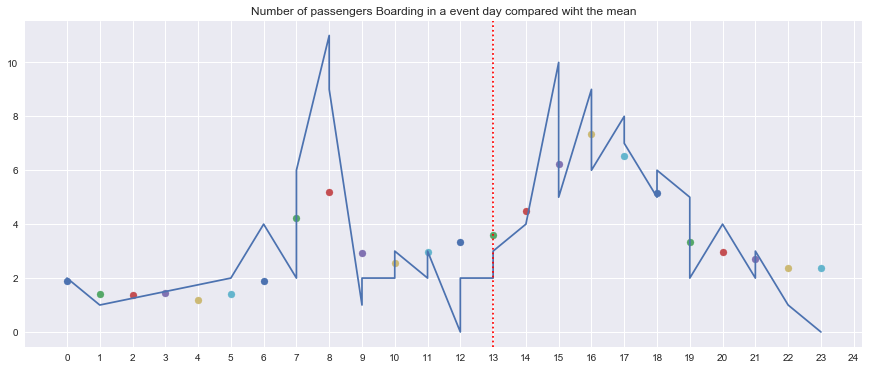

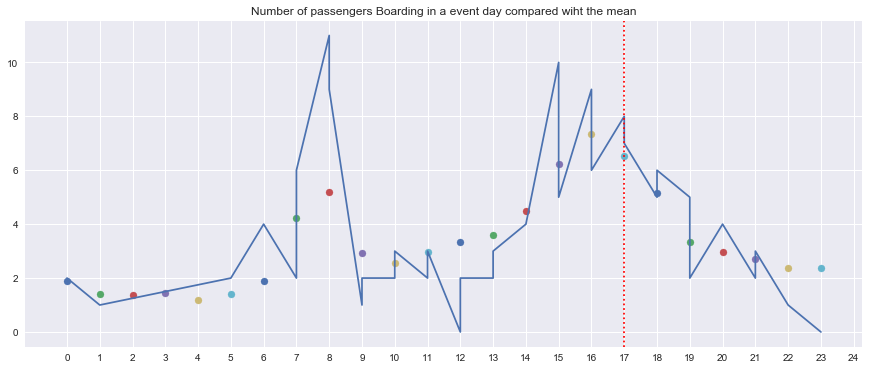

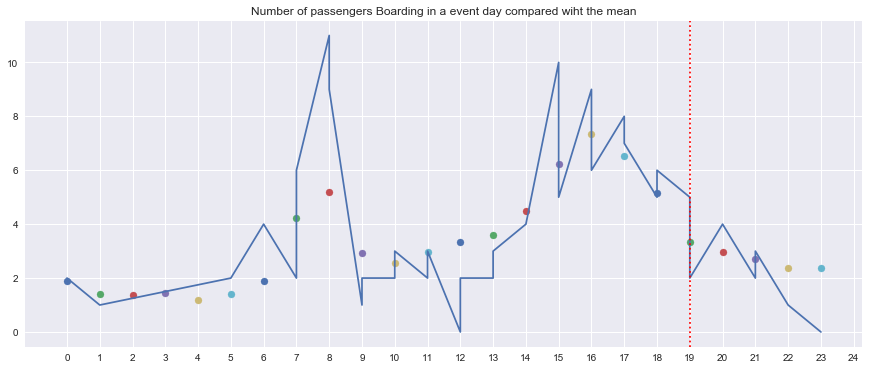

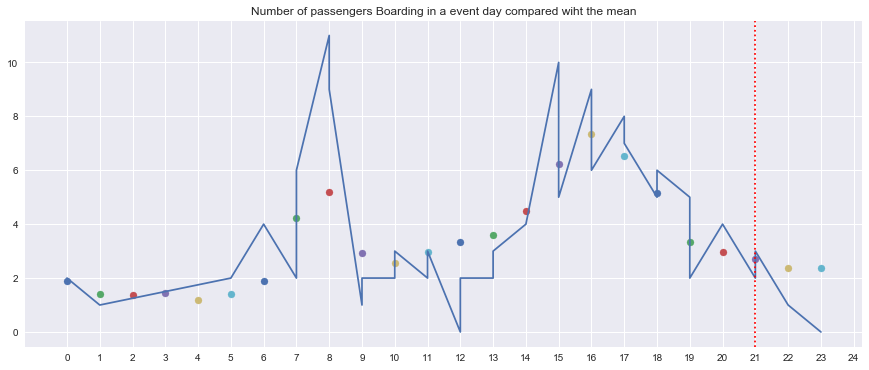

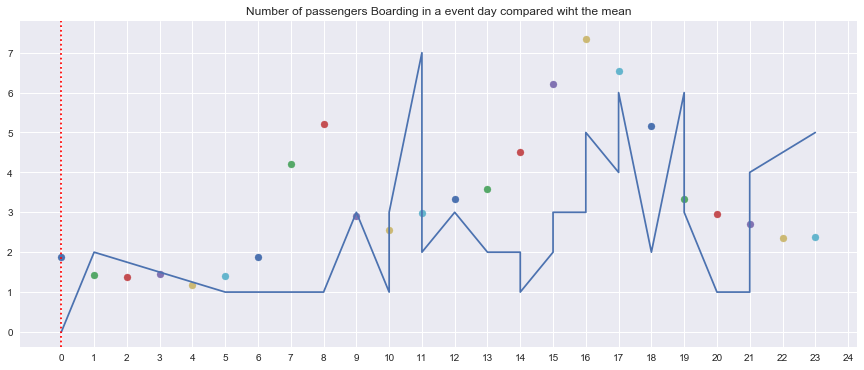

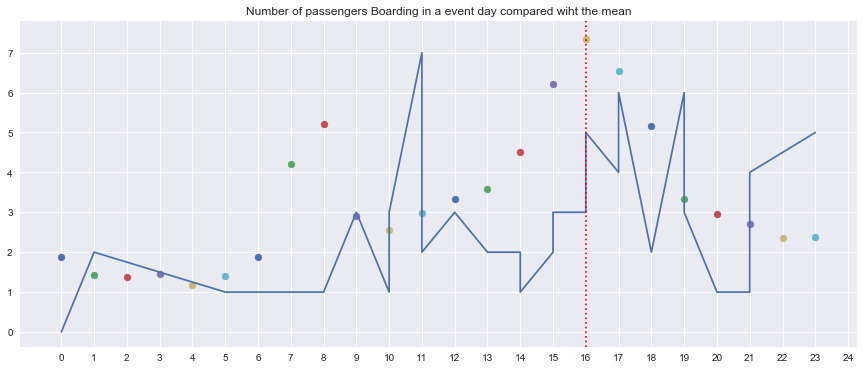

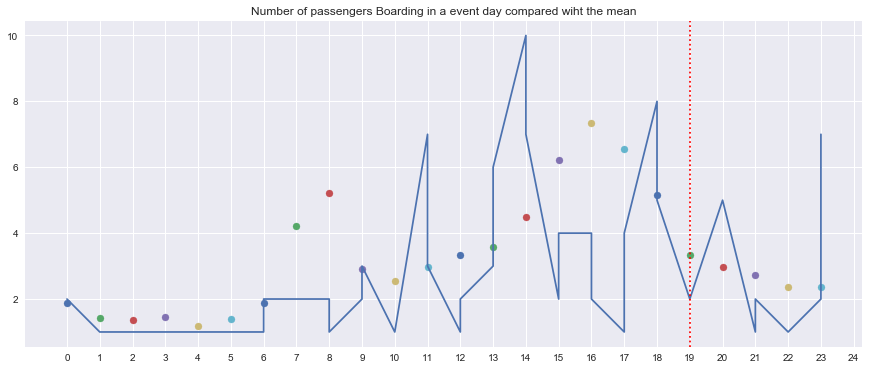

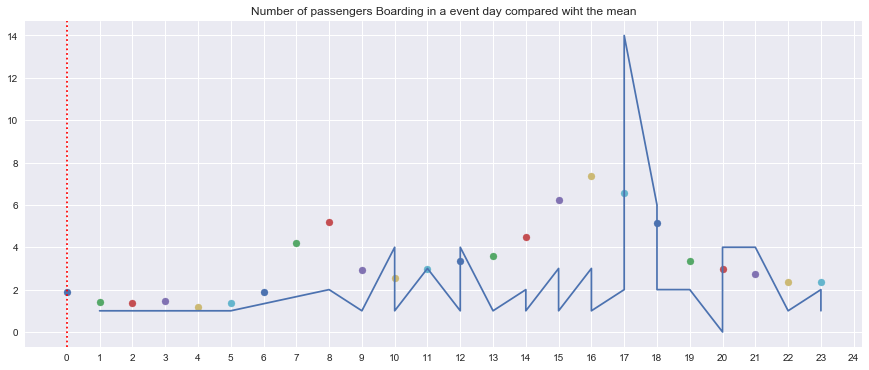

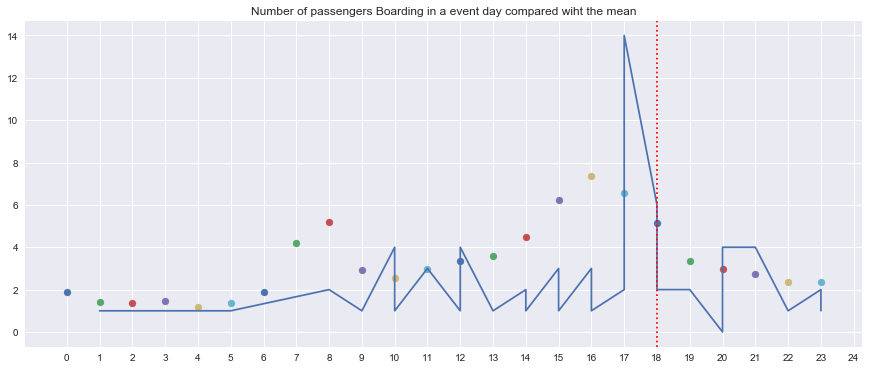

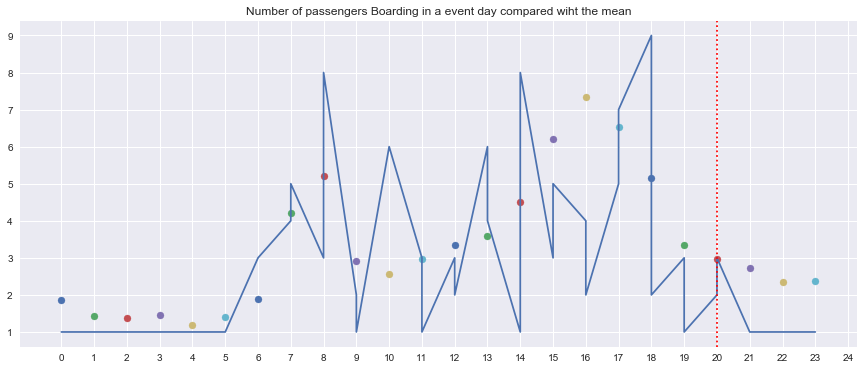

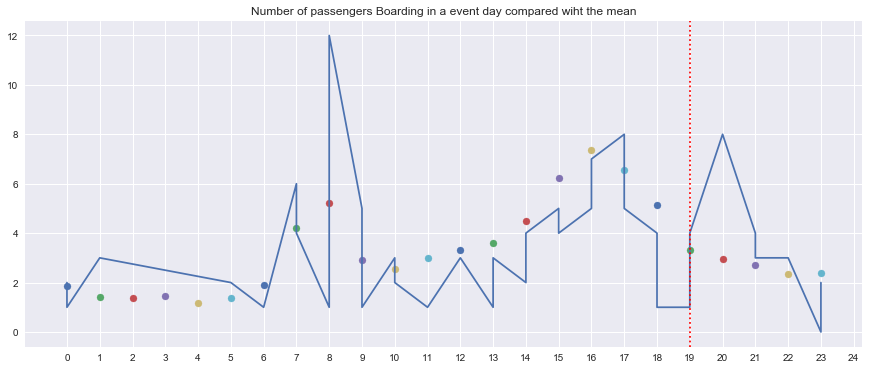

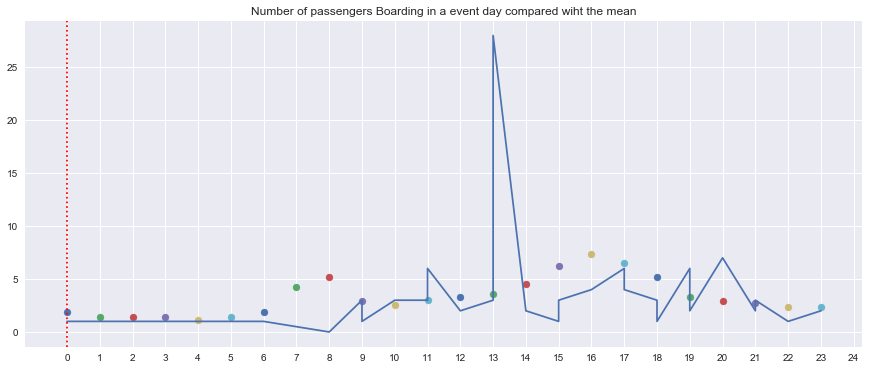

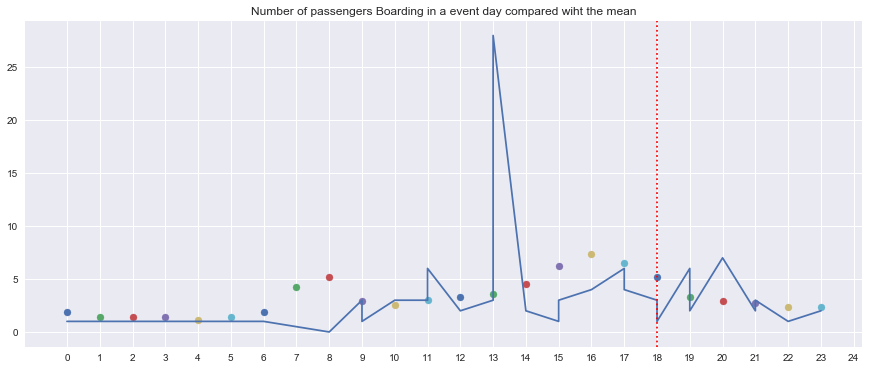

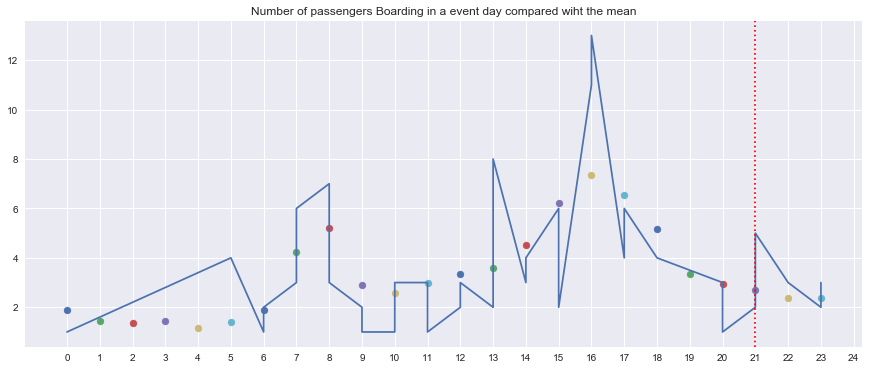

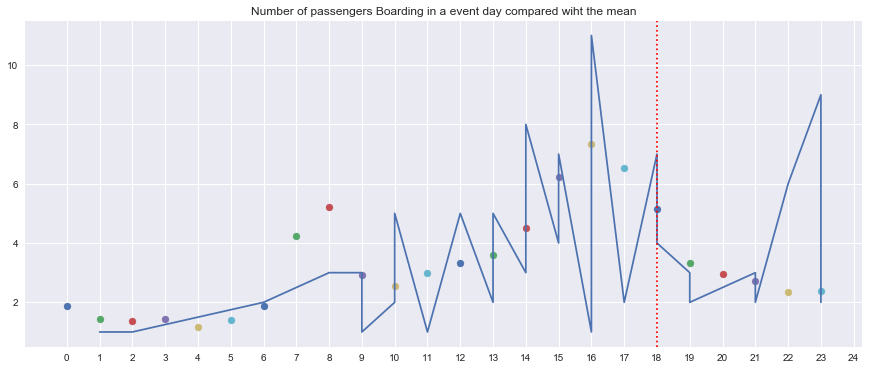

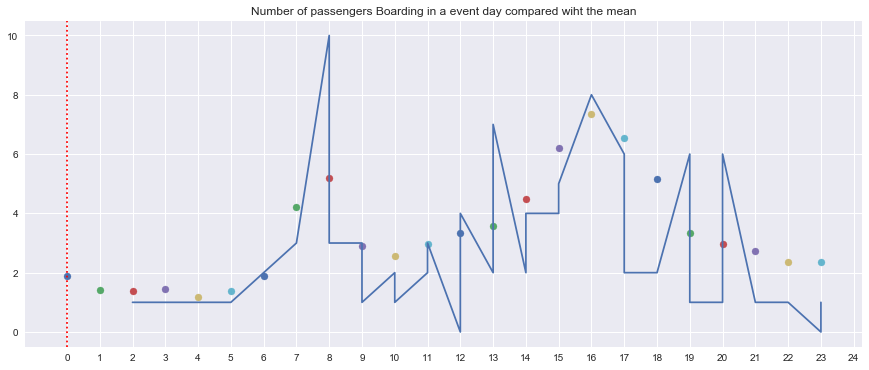

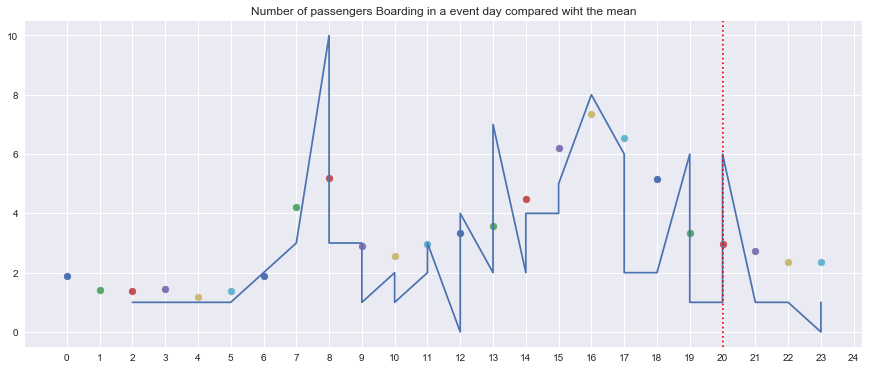

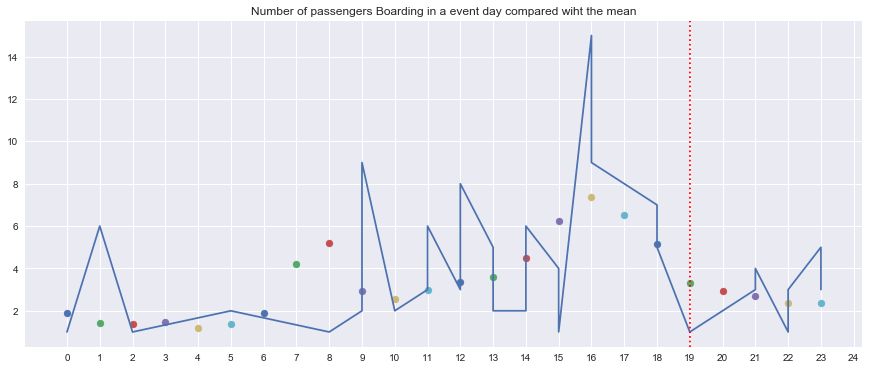

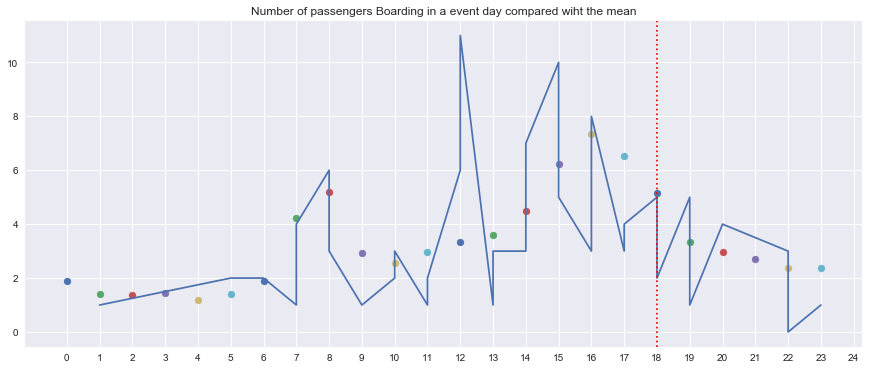

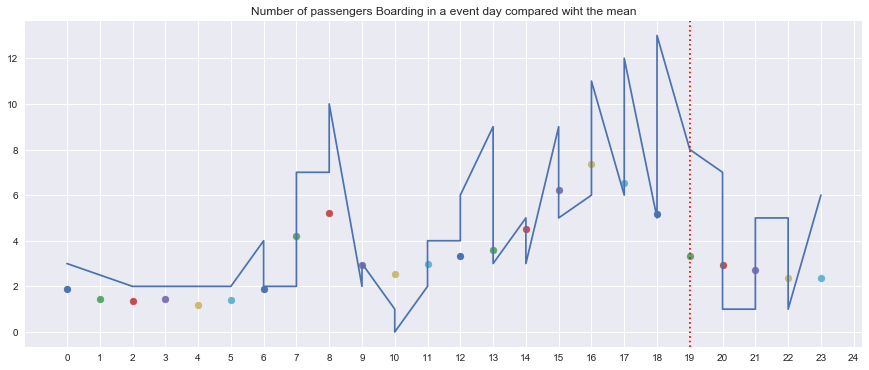

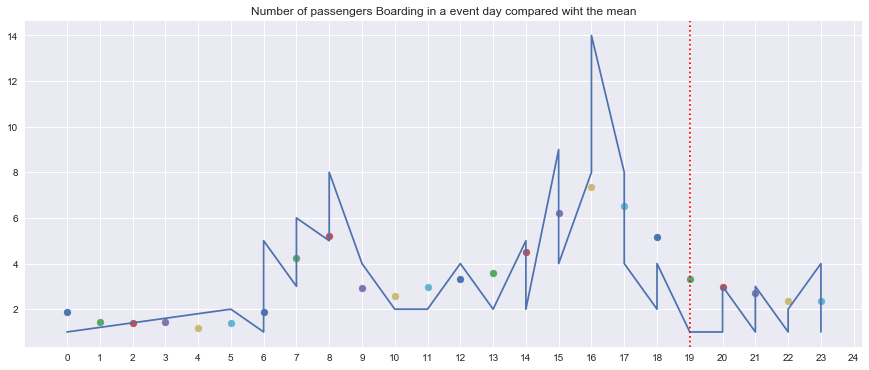

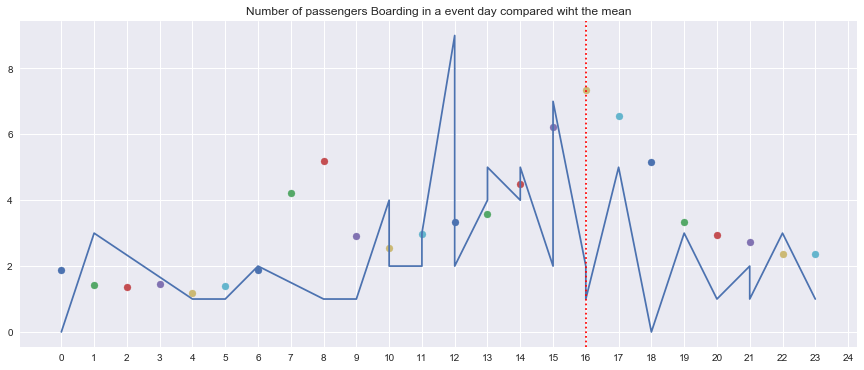

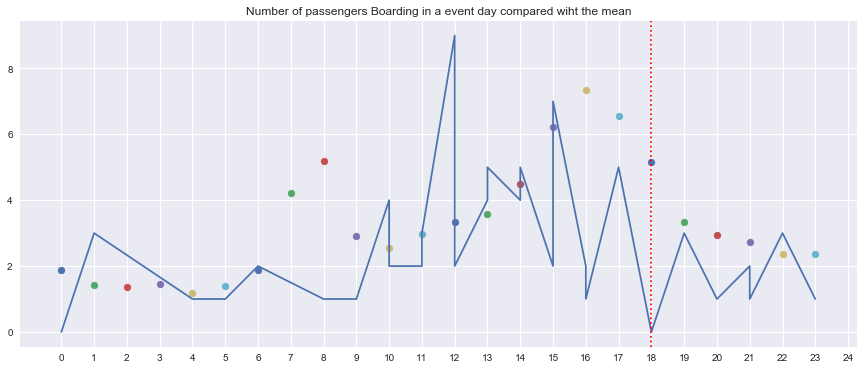

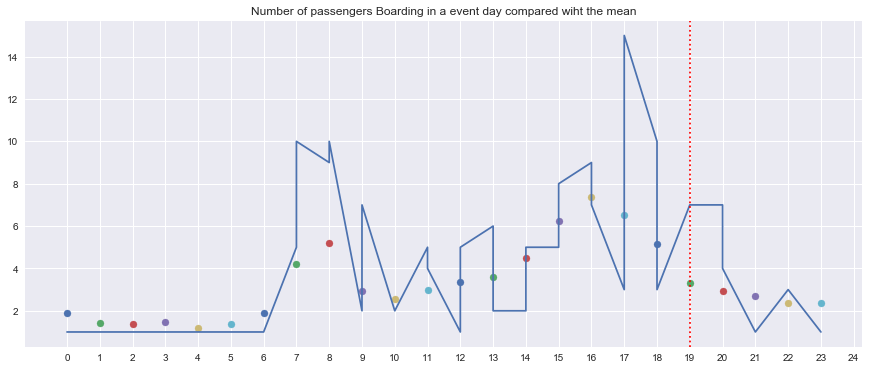

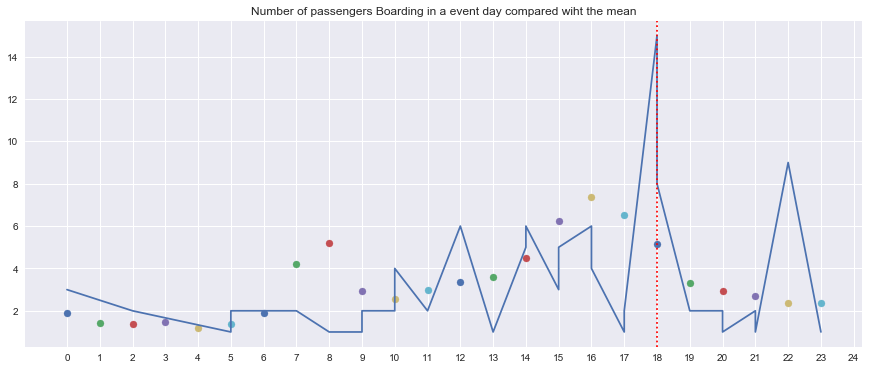

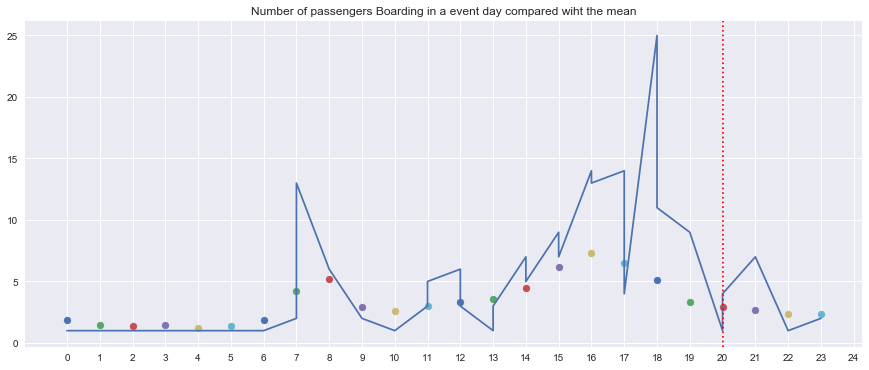

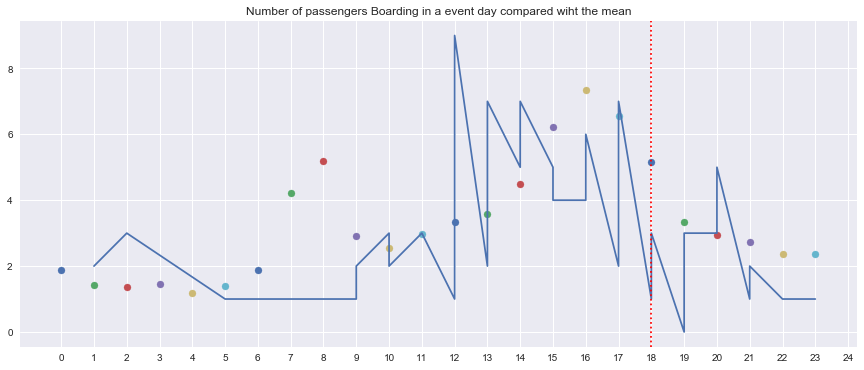

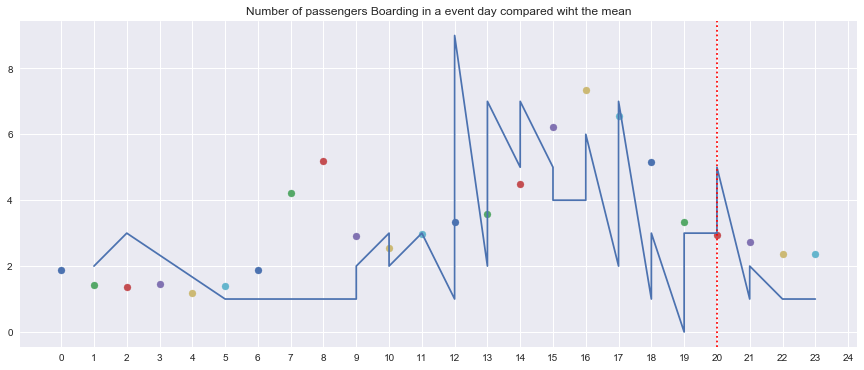

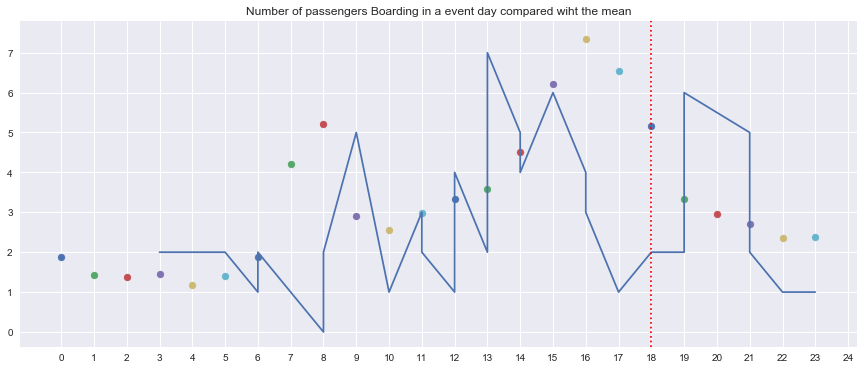

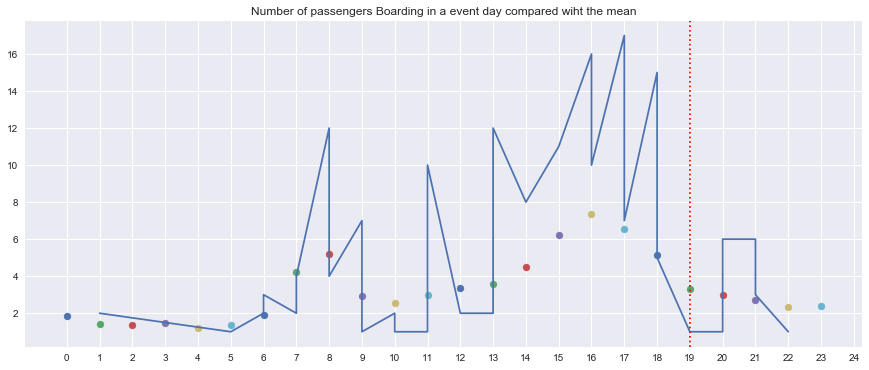

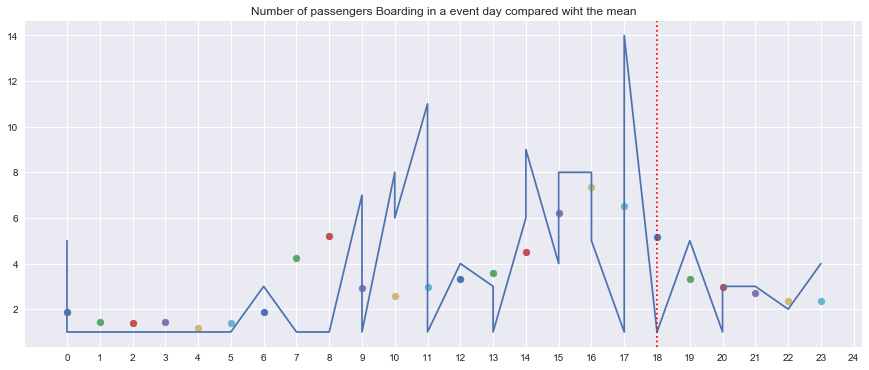

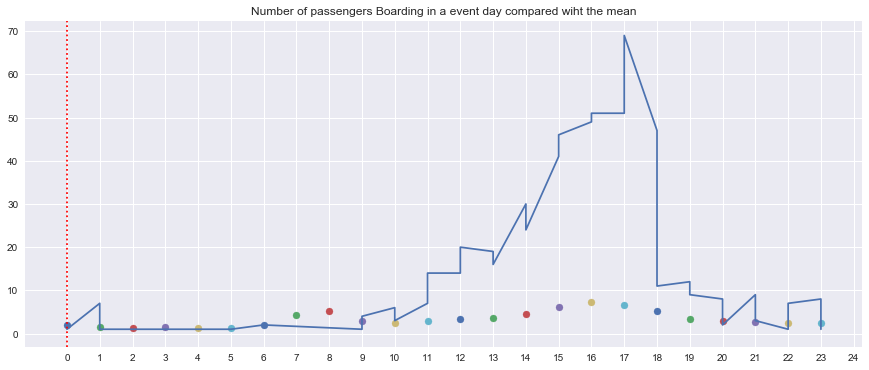

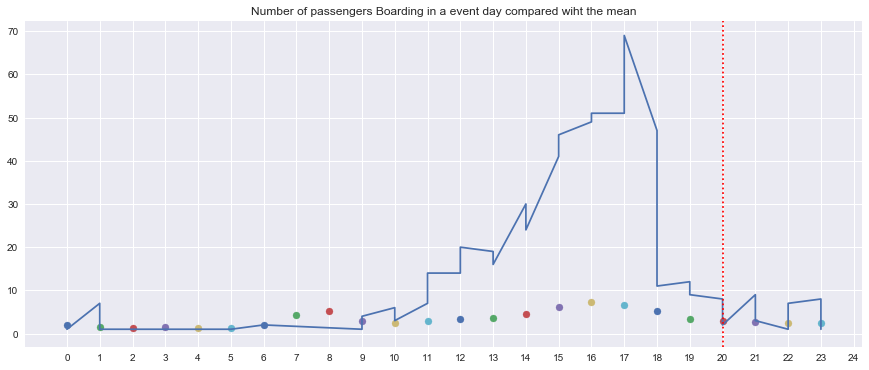

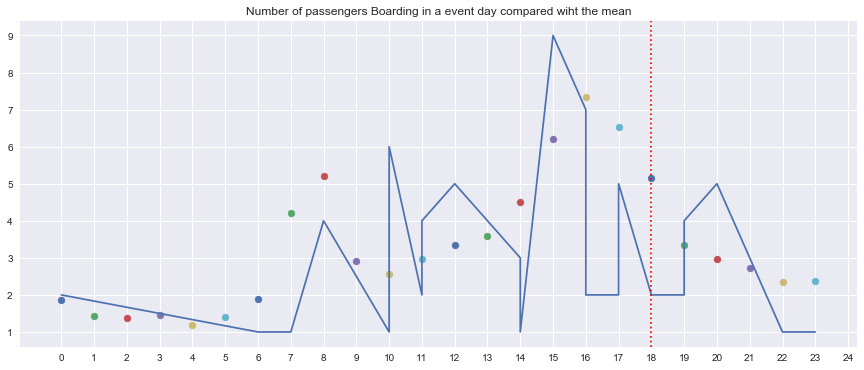

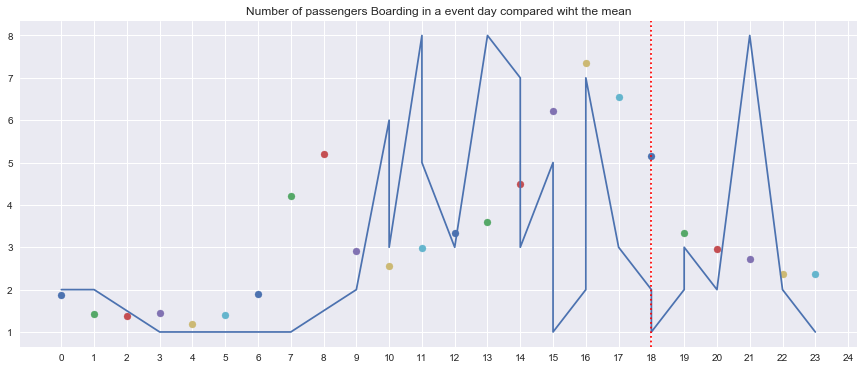

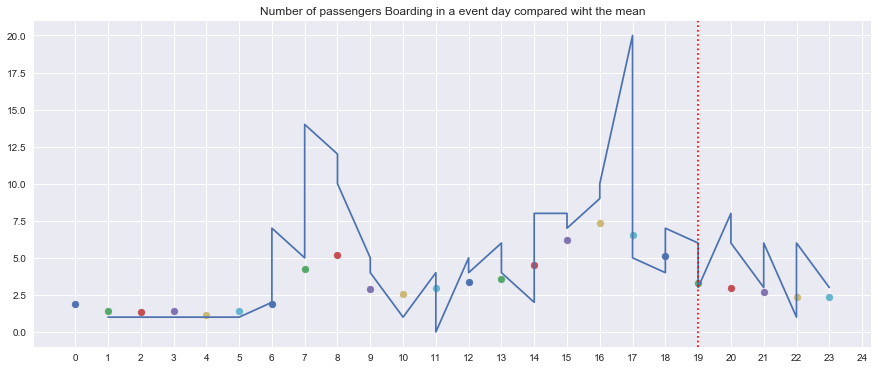

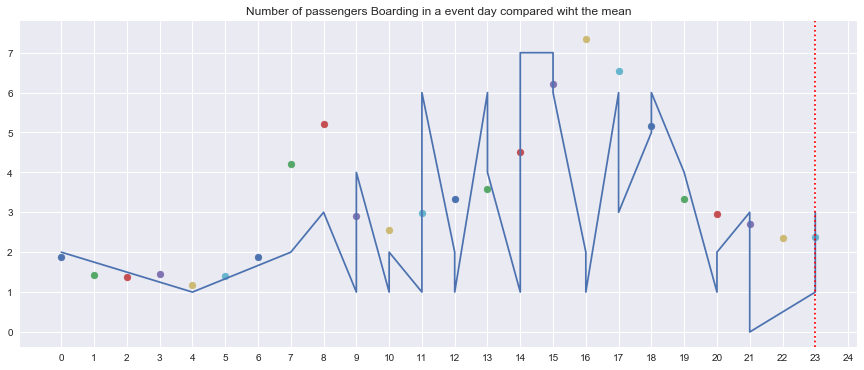

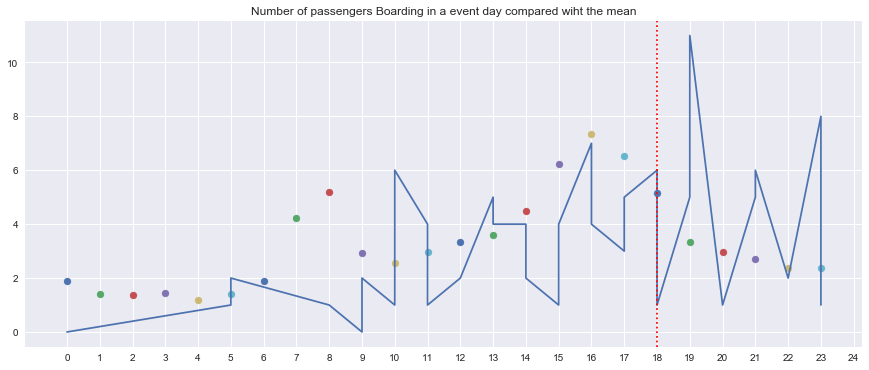

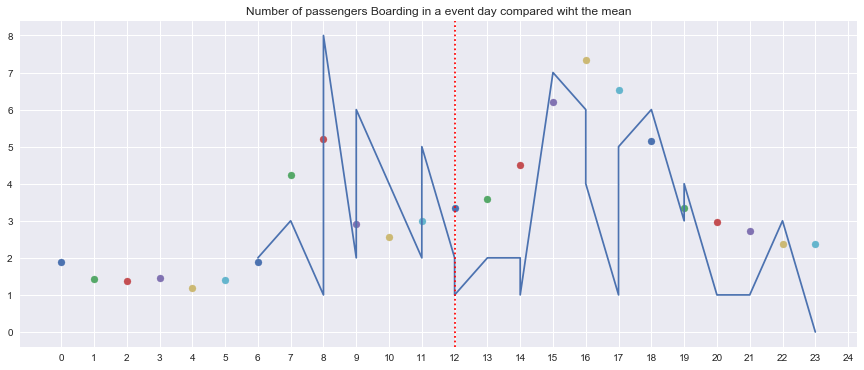

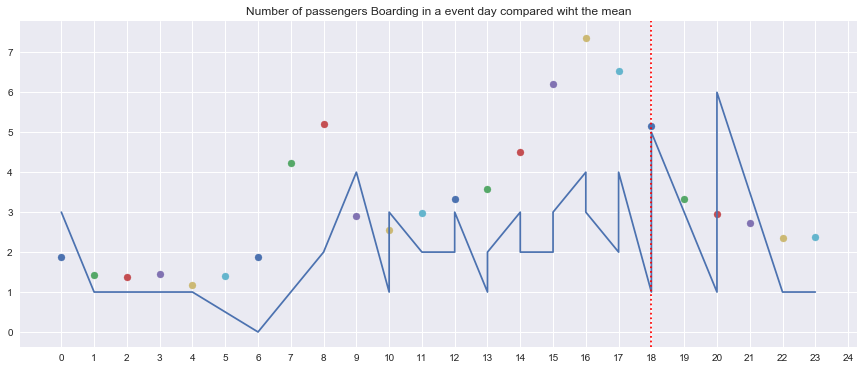

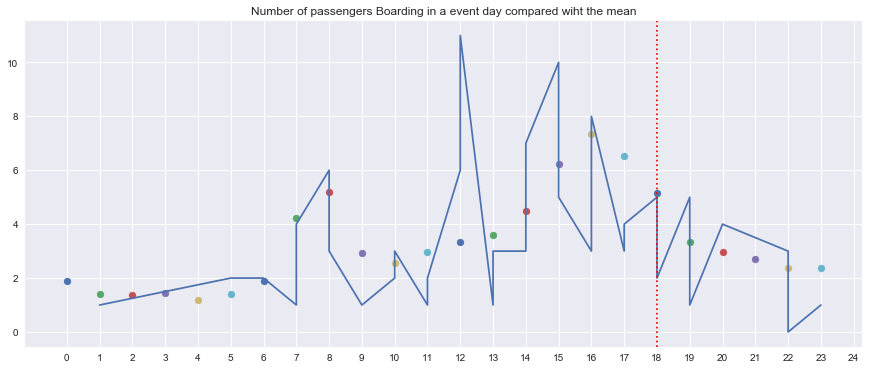

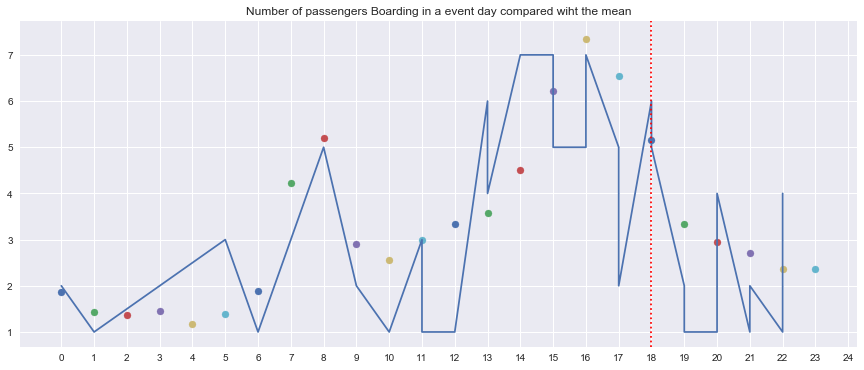

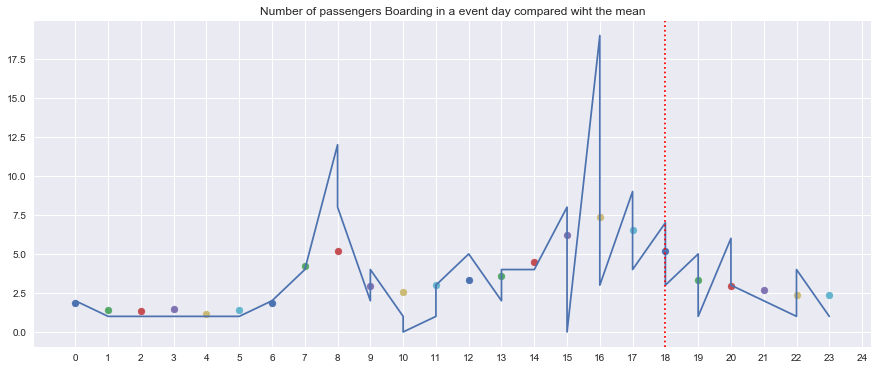

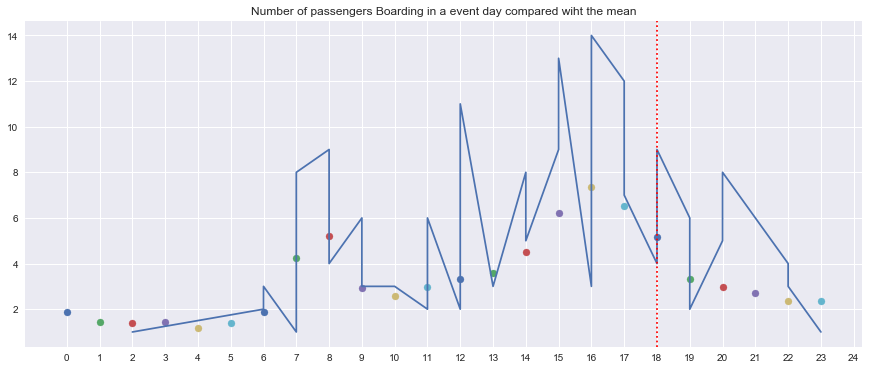

In [26]:
plt.rcParams['figure.figsize'] = (15, 6)


df_1ve=list_al_grouped[2]# Forum ; Vega;  Bella Center;   DR Koncerthuset;  Royal Arena;   Parken
                        #  0       1           2                3               4           5
    
ev_1ve=ev[ev['venue_unique']==ven_name_ev[4]]  #'DrKoncerthuset' 'ForumCopenhagen' 'TeliaPerken' 'Vega' 'BellaCenter''RoyalArena']
                                                 #    0                 1                2            3        4           5

ev_1ve=ev_1ve[ev_1ve['starting_time'].dt.year==2017]
for data in ev_1ve.starting_time:
    mo=data.month
    day=data.day
    hour=data.hour
    df_1m=df_1ve[df_1ve['TimeStep'].dt.month==mo]
    df_1d=df_1m[df_1m['TimeStep'].dt.day==day]

    plt.plot(df_1d['TimeStep'].dt.hour,df_1d['BoardingPassengerCount'])
    plt.axvline(x=hour, color='r', linestyle=':')
    plt.xticks(np.arange(0, 25, 1.0))
    for i in range(24):
        plt.scatter(i,np.mean(df_1ve['BoardingPassengerCount'][df_1ve['hours']==i]))
    plt.title("Number of passengers Boarding in a event day compared wiht the mean")
#     print(hour)
    plt.show()

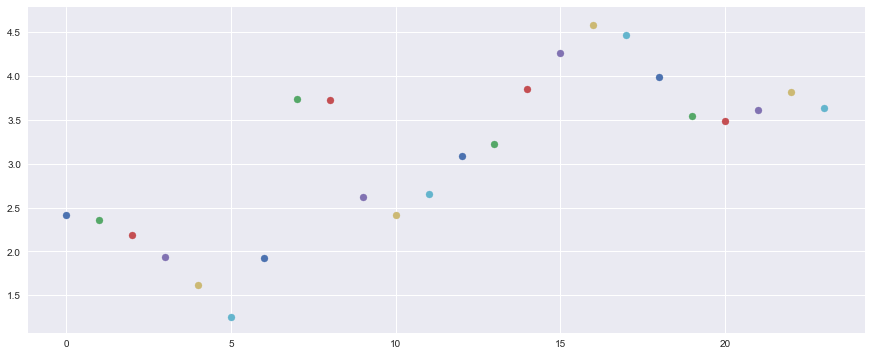

In [27]:
#mean of passengers over the hours

for i in range(24):
    plt.scatter(i,np.mean(al['BoardingPassengerCount'][al['hours']==i]))
    
plt.show()